In [2]:
# To do list:
# - Find Days in drive repository folder
# - Load files of a day:
#   * Infrared Images
#   * Pyranometer Measures
#   * Weather Data

import os
import pickle

import numpy as np
import matplotlib.pylab as plt

#from cv2 import imread, IMREAD_UNCHANGED
from scipy import interpolate
from datetime import datetime
# To do list:
# - Define Dataset
# - Train and test samples
# - Polynimial Model Validation
# - Variables Validation
# - Error Metrics

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score

# Combine Weather Station and Atmospheric Model Parameters Dataset

In [15]:
# Load Data from a pickle
def _load_data(file):
    with open(file, 'rb') as f:
        X = pickle.Unpickler(f).load()
    return X

# save the Dataset
path = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\data\{}'
name = r'atmospheric_model_parameters_dataset_v1-1.pkl'
file = path.format(name)
D_, A_, W_, E_, C_, T_ = _load_data(file)
#D_, T_, A_, W_, B_, E_, C_ = _load_data(file)
#print(len(D_), len(A_), len(W_), len(E_), len(C_), len(T_))

In [16]:
# Load csv file
def _load_csv_file(path):
    return np.loadtxt(open(path, "rb"), delimiter = ",")

path = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\samples'

X_ = []
Y_ = []
for file_ in os.listdir(path):
    path_file = r'{}\{}'.format(path, file_)
    #print(path_file)
    try:
        X = _load_csv_file(path_file)
        X_.append(X)
        Y_.append(file_[:-4].replace('_', '-'))
    except:
        pass

In [18]:
# Find common days in both datasets
def _find_commom_files(A_, B_):
    both   = set(A_).intersection(B_)
    idx_A_ = [A_.index(x) for x in both]
    idx_B_ = [B_.index(x) for x in both]
    return idx_A_, idx_B_

# Transform human to Unix time
def _human_to_unix_time(t_):
    u_ = np.zeros(t_.shape[0])
    for i in range(t_.shape[0]):
        u_[i] = t_[i, 0].timestamp()
    return u_

# Combine both datasets
def _combinate_both_datasets(x_, a_, w_, e_, c_, idx_1_, idx_2_):
    # Concatenate Covariates
    x_ = np.concatenate((x_[idx_1_], a_[idx_2_]), axis = 1)
    # Obtaine regressors
    y_ = w_[idx_2_]
    # Concatenate Error Metrix
    #r_ = np.concatenate((e_[idx_2_], c_[idx_2_]), axis = 1) 
    r_ = c_[idx_2_]
    # Magnitude of the error
    #m_ = np.sqrt(e_[idx_2_]**2 + c_[idx_2_]**2)
    return x_, y_, r_

# Save Data in a pickle
def _save_data(X_, file):
    with open(file, 'wb') as f:
        pickle.dump(X_, f)

# Variables Initialization
Cov_ = []
Reg_ = []
Mag_ = []
# Find common days in both datasets
idx_D_, idx_Y_ = _find_commom_files(D_, Y_)
# Loop over the common days
for i, j in zip(idx_D_, idx_Y_):
    # Extract Clear Sky day
    d_ = D_[i] 
    y_ = Y_[j]
    print(d_, y_)
    # Extract Weather Station dataset
    x_ = X_[j]
    # Extract Atmospheric model parameters dataset
    a_ = A_[i] 
    t_ = T_[i]
    w_ = W_[i]
    #w_ = np.hstack((W_[i], B_[i]))
    e_ = E_[i]
    c_ = C_[i]
    # Transform Human time to Unix time
    u_1_ = x_[:, 0]
    u_2_ = _human_to_unix_time(t_)
    # numpy.intersect1d(ar1, ar2, assume_unique=False, return_indices=False)[source]
    u_, idx_1_, idx_2_ = np.intersect1d(u_1_, u_2_, assume_unique = False, return_indices = True)
    print(e_.shape, c_.shape, idx_1_.shape, idx_2_.shape)
    x_, y_, e_ = _combinate_both_datasets(x_, a_, w_, e_, c_, idx_1_, idx_2_)
    Cov_.append(x_)
    Reg_.append(y_)
    Mag_.append(e_)
    
E_ = np.concatenate(Mag_, axis = 0)
print(np.mean(E_, axis = 0), np.mean(E_, axis = 0).sum())
# save the Dataset
path = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\data\{}'
name = r'atmospheric_model_parameters_fitting_dataset_v1-1.pkl'
file = path.format(name)
print(file)
_save_data([Cov_, Reg_, Mag_], file)

# atmospheric_model_parameters_dataset_v1: [267.83238264 968.72389557] 1236.556278203493
# atmospheric_model_parameters_dataset_v2: [279.28366583 993.45759003] 1272.7412558519507

2018-07-01 2018-07-01
(2919, 1) (2919, 1) (2560,) (2560,)
2018-05-24 2018-05-24
(2876, 1) (2876, 1) (2492,) (2492,)
2018-05-19 2018-05-19
(2854, 1) (2854, 1) (2466,) (2466,)
2018-03-04 2018-03-04
(2180, 1) (2180, 1) (1836,) (1836,)
2018-06-24 2018-06-24
(2728, 1) (2728, 1) (2447,) (2447,)
2017-12-15 2017-12-15
(1833, 1) (1833, 1) (1435,) (1435,)
2018-09-12 2018-09-12
(2475, 1) (2475, 1) (2079,) (2079,)
2018-11-06 2018-11-06
(2007, 1) (2007, 1) (1609,) (1609,)
2018-08-09 2018-08-09
(2491, 1) (2491, 1) (2266,) (2266,)
2018-05-23 2018-05-23
(2850, 1) (2850, 1) (2466,) (2466,)
2018-07-18 2018-07-18
(2399, 1) (2399, 1) (2233,) (2233,)
2018-11-08 2018-11-08
(1994, 1) (1994, 1) (1595,) (1595,)
2018-05-16 2018-05-16
(2839, 1) (2839, 1) (2447,) (2447,)
2017-12-13 2017-12-13
(1835, 1) (1835, 1) (1438,) (1438,)
2018-01-01 2018-01-01
(1843, 1) (1843, 1) (1443,) (1443,)
2018-03-02 2018-03-02
(2217, 1) (2217, 1) (1818,) (1818,)
2018-01-27 2018-01-27
(1954, 1) (1954, 1) (1555,) (1555,)
2018-01-12 201

# Atmospheric Parameters Model Cross-Validation

C:\Users\Guille\Desktop\troposphere_radiometry_model\data\atmospheric_model_parameters_fitting_dataset_v1-1.pkl
51 51 51
2018_07_01


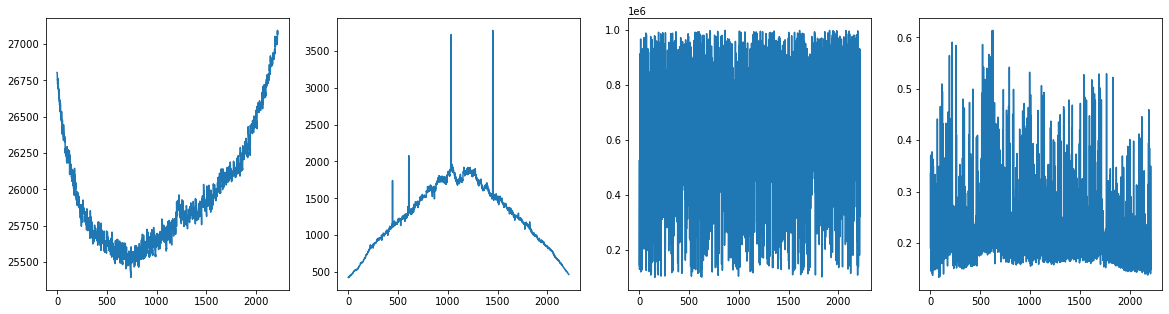

2018_05_24


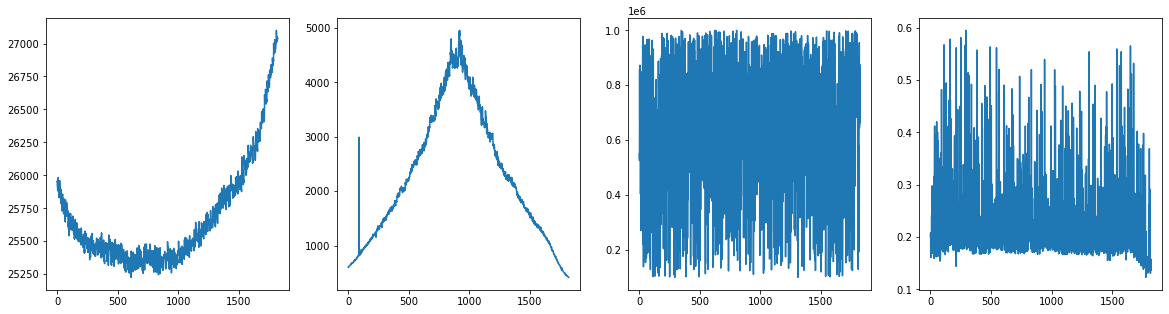

2018_05_19


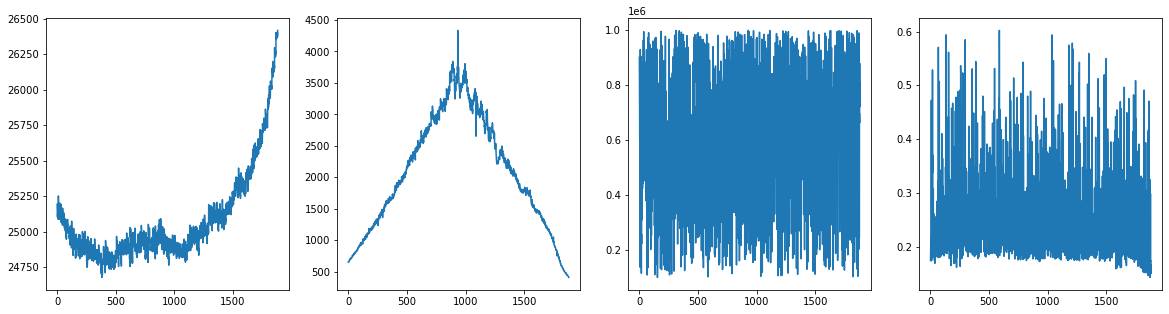

2018_03_04


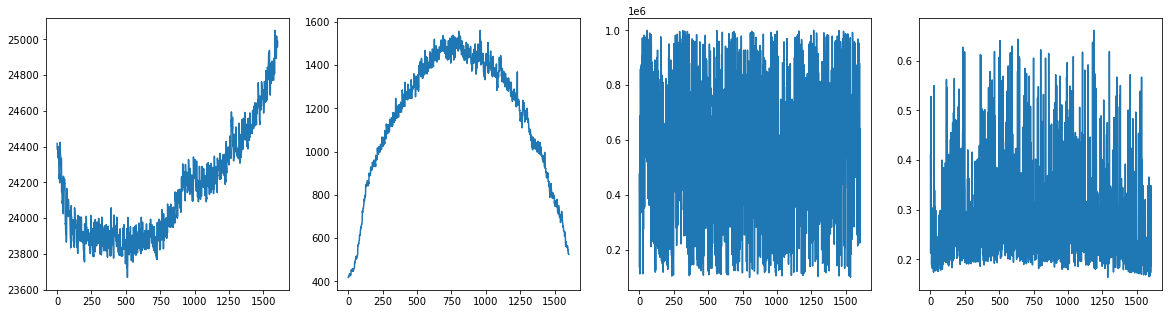

2018_06_24


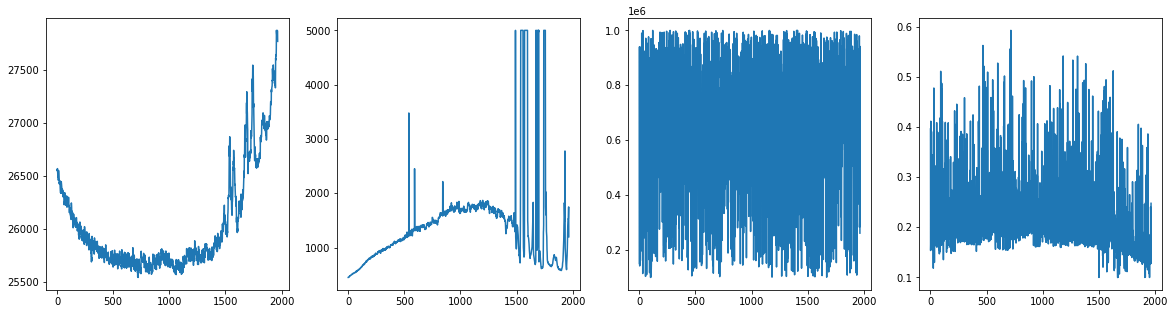

2017_12_15


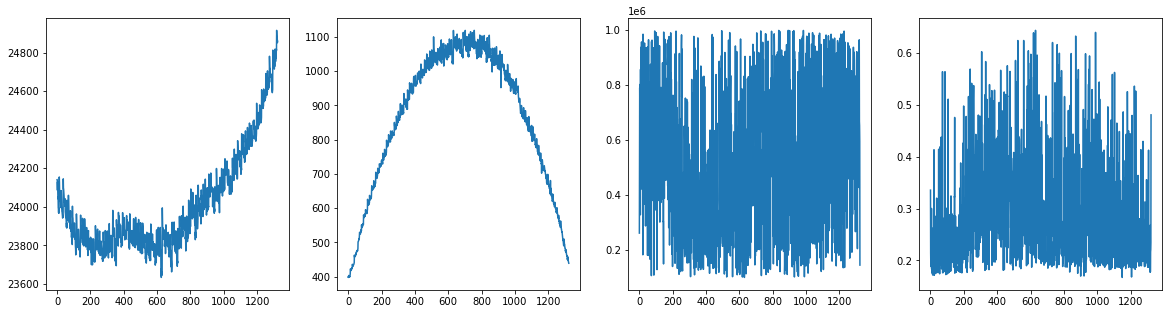

2018_09_12


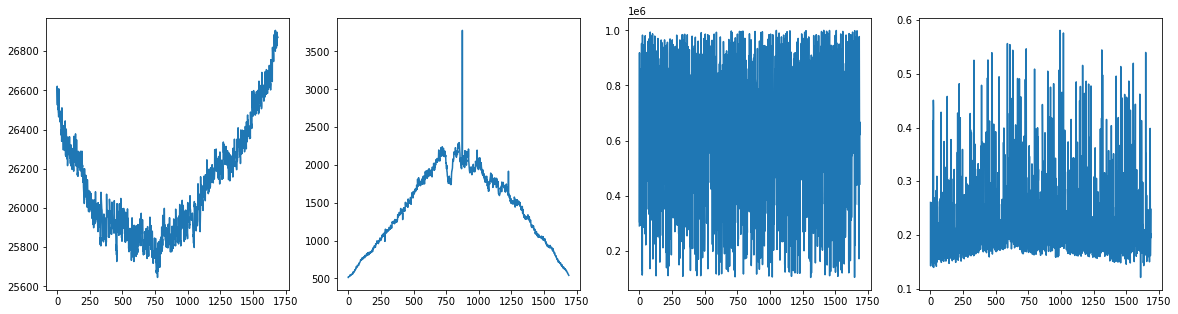

2018_11_06


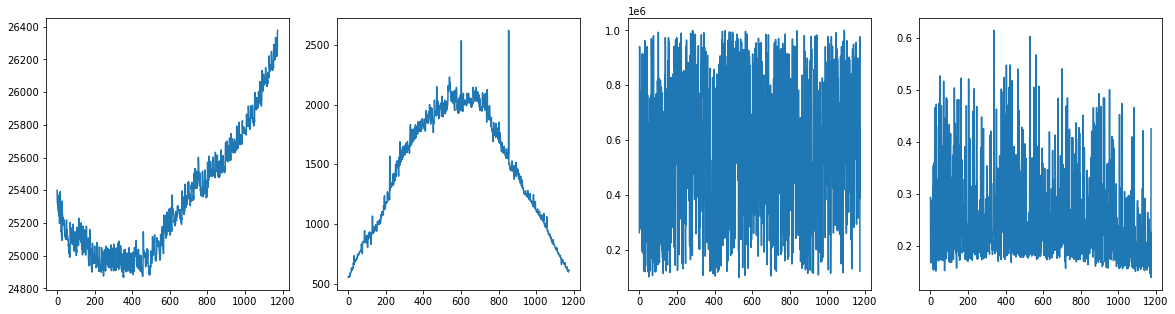

2018_08_09


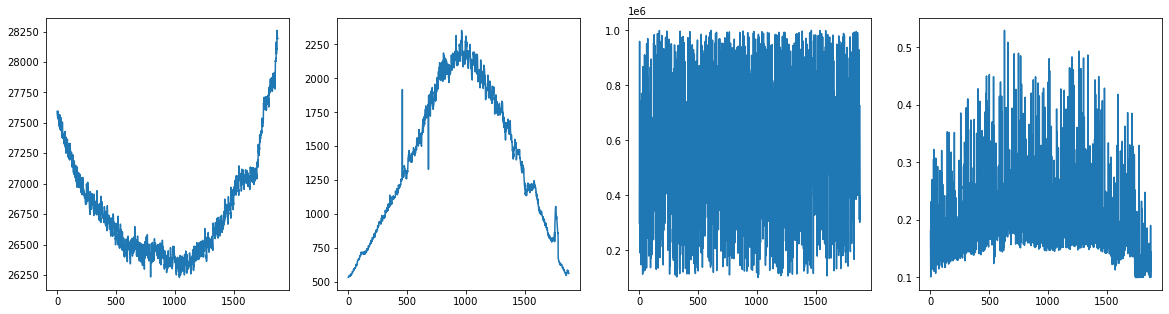

2018_05_23


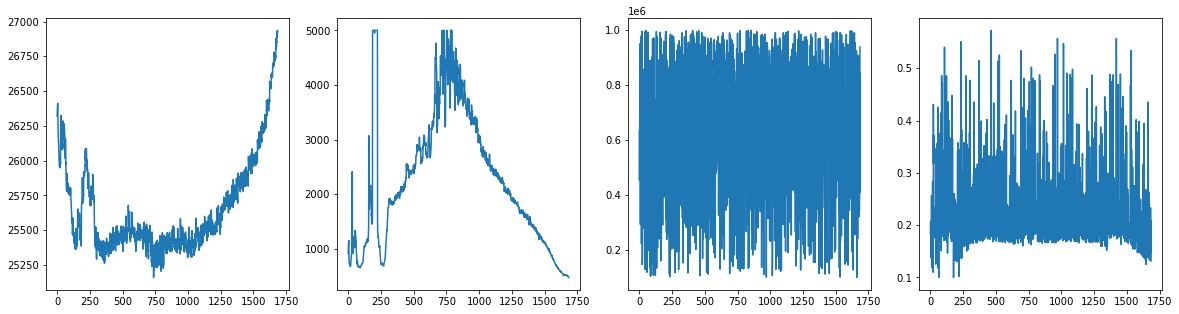

2018_07_18


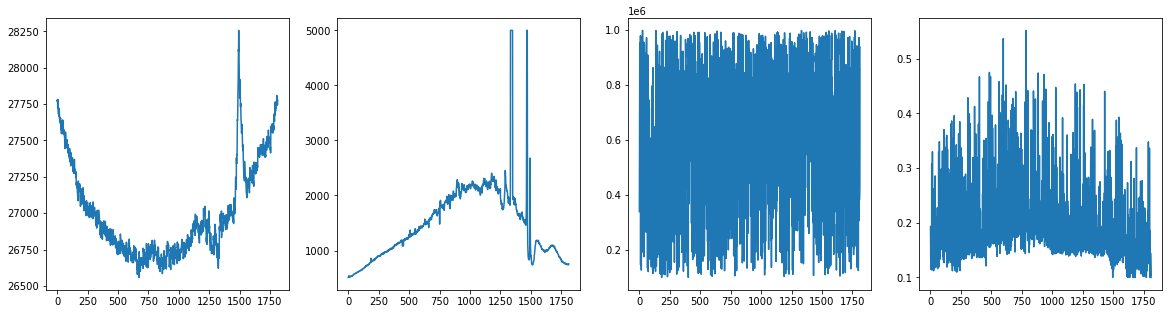

2018_11_08


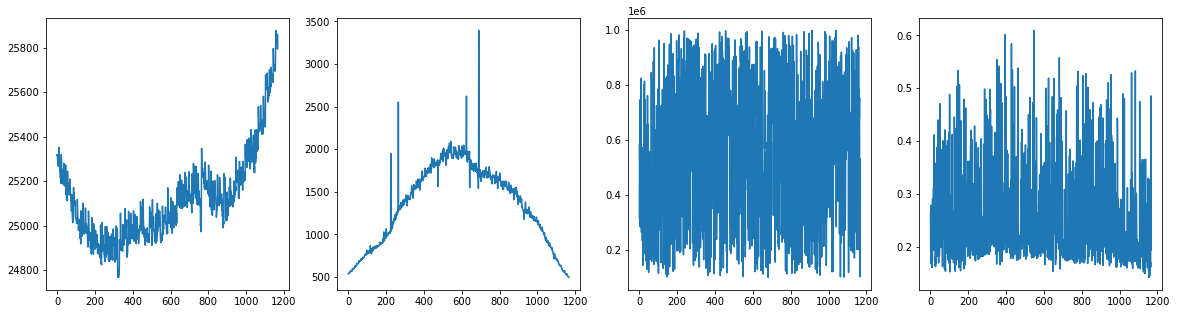

2018_05_16


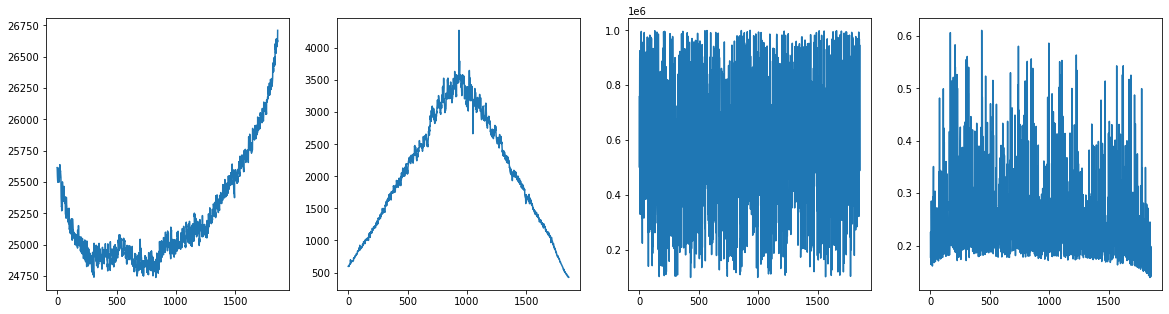

2017_12_13


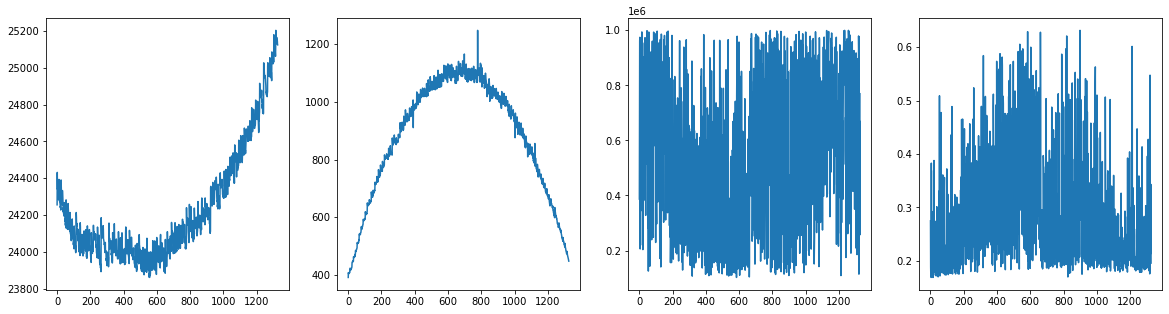

2018_01_01


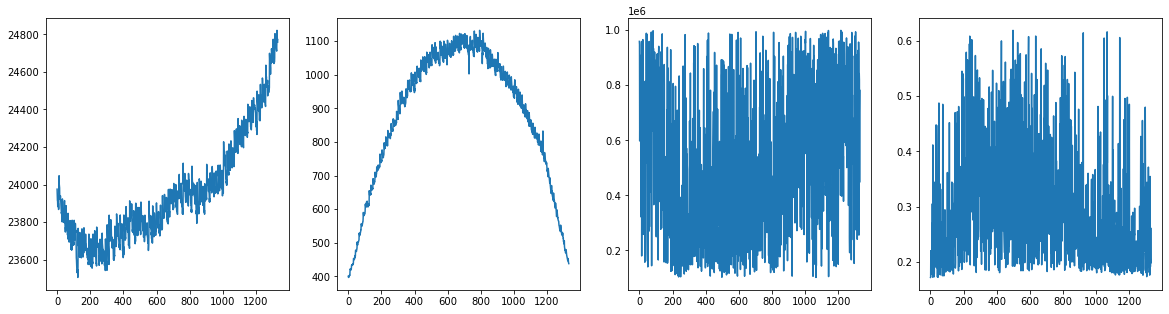

2018_03_02


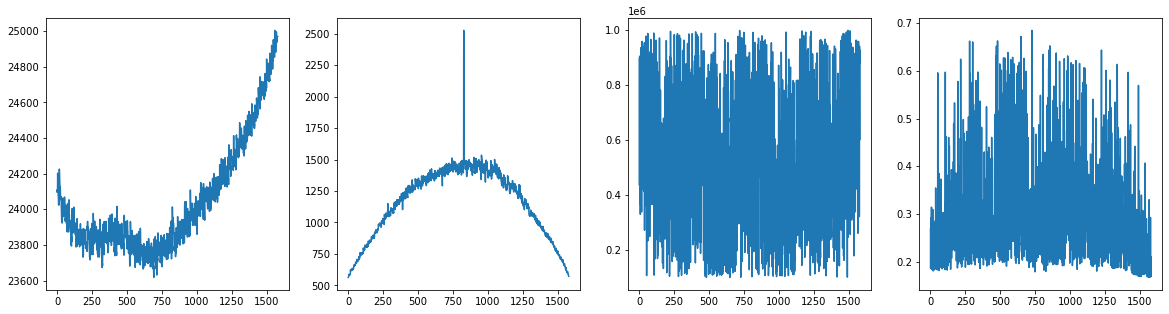

2018_01_27


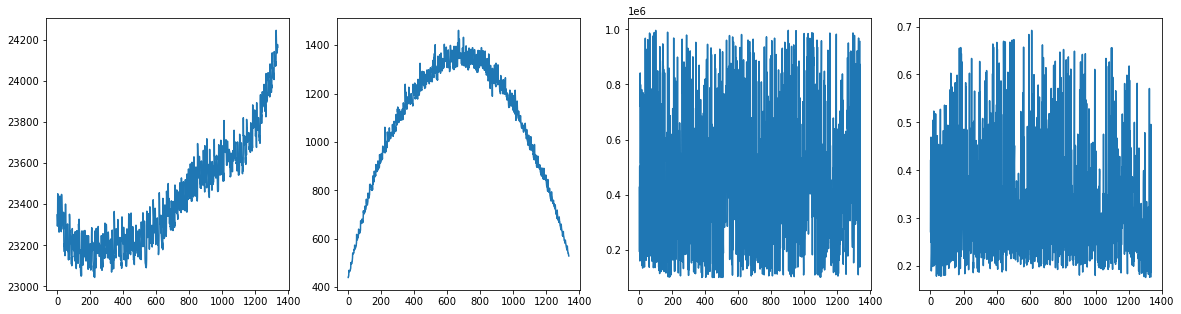

2018_01_12


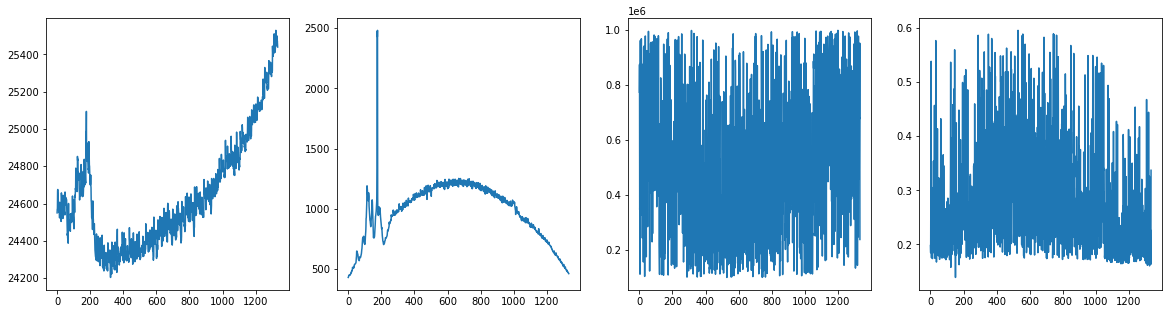

2018_01_22


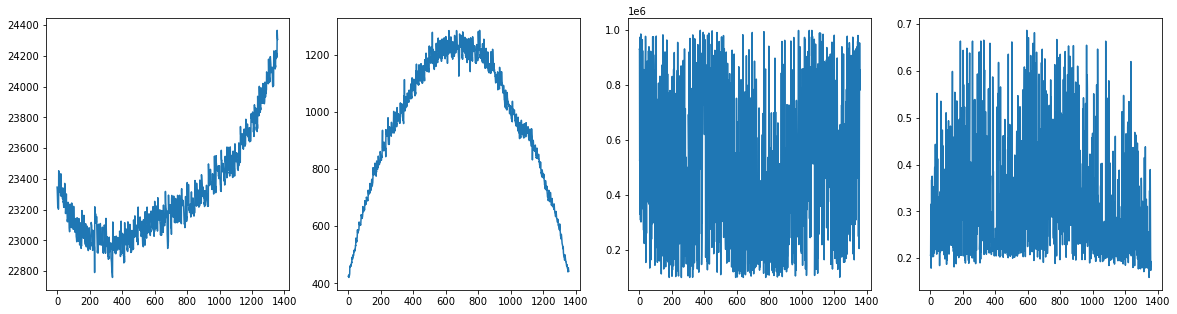

2018_06_12


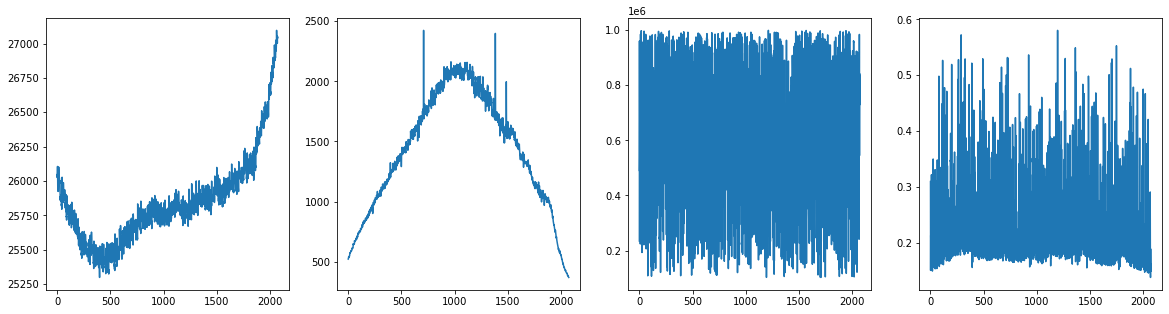

2018_06_08


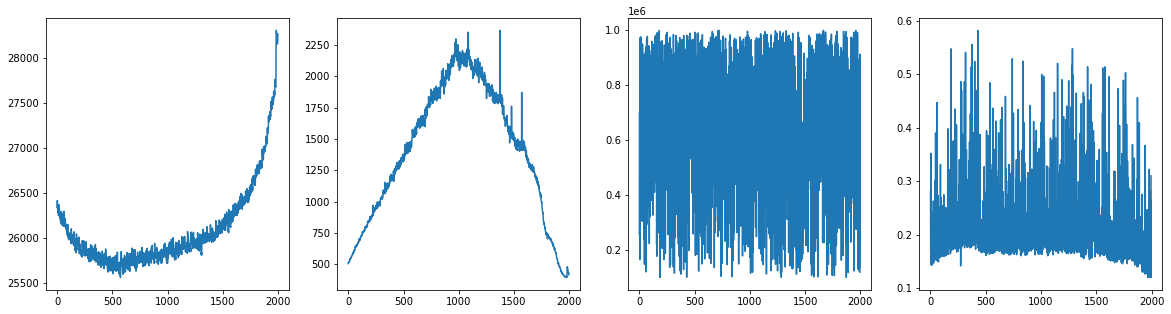

2018_09_13


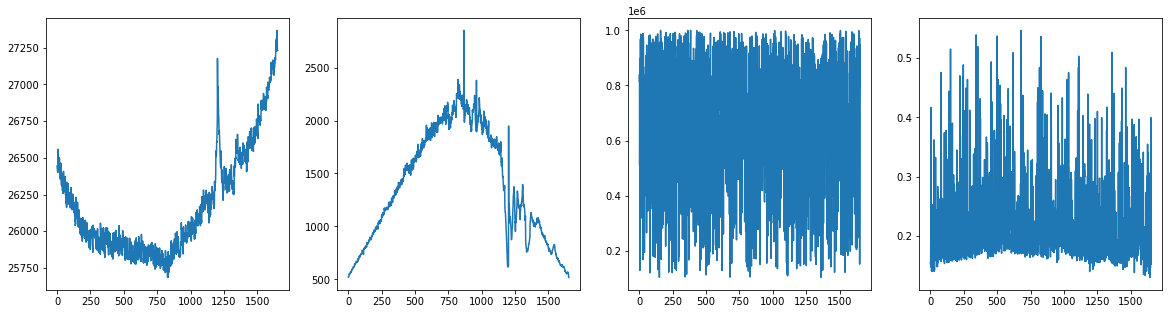

2018_11_07


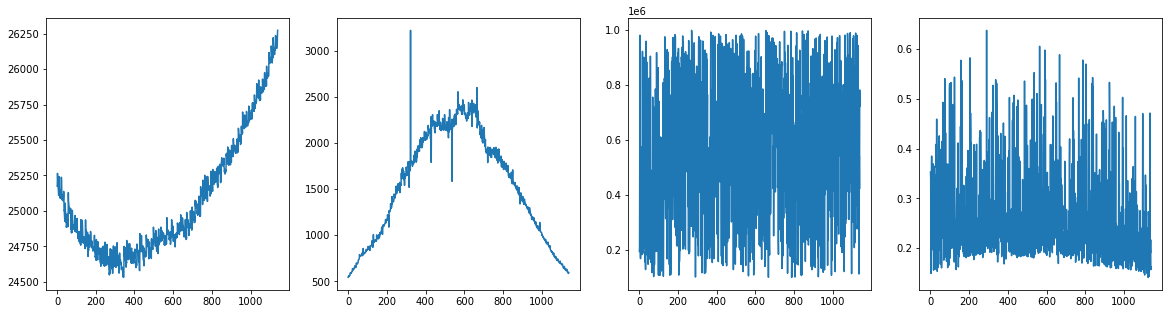

2017_12_09


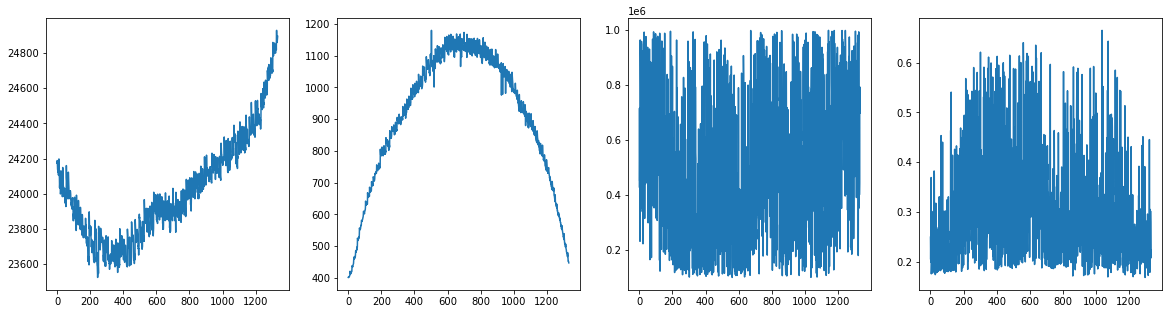

2018_01_11


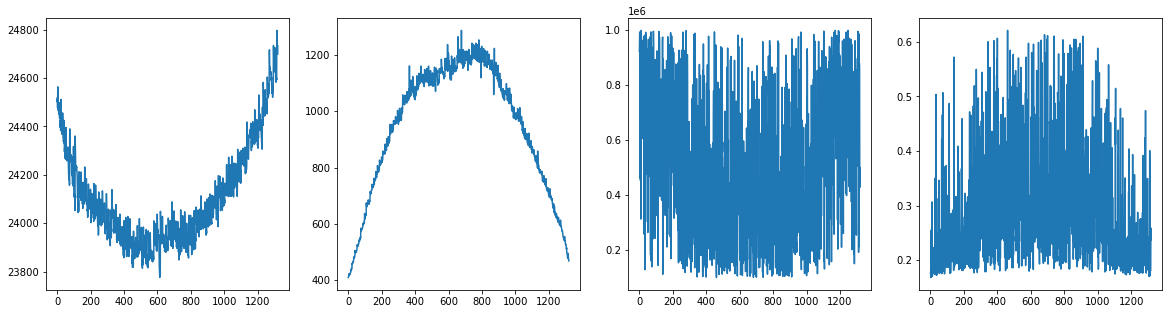

2018_06_07


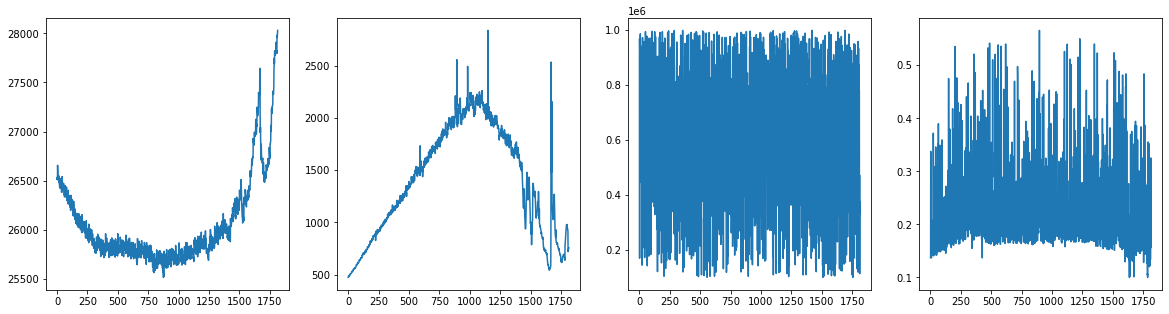

2018_09_22


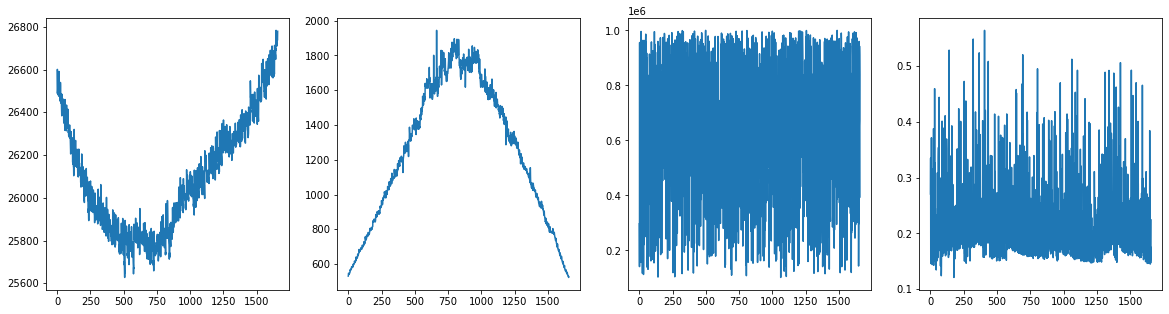

2018_02_07


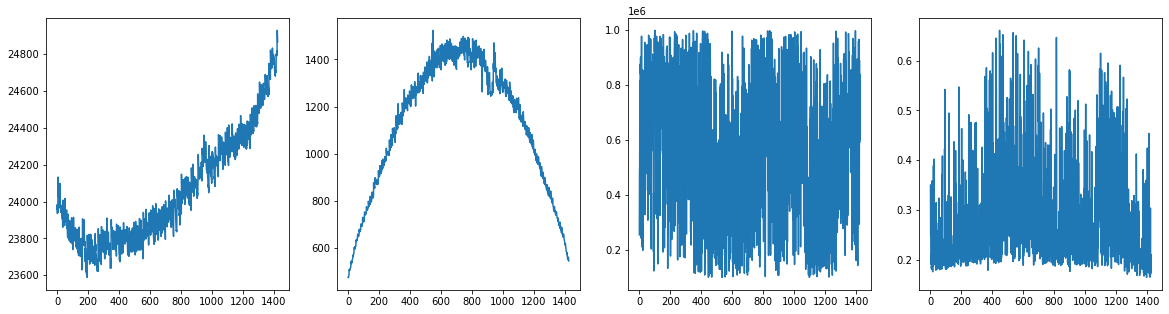

2018_02_11


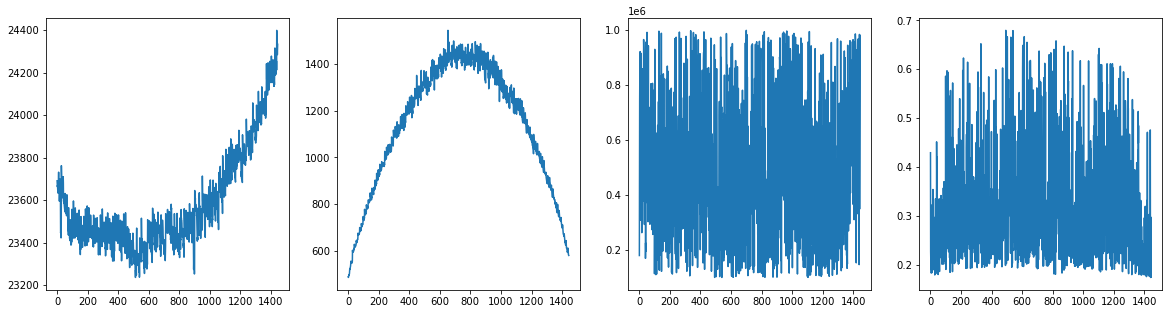

2018_02_02


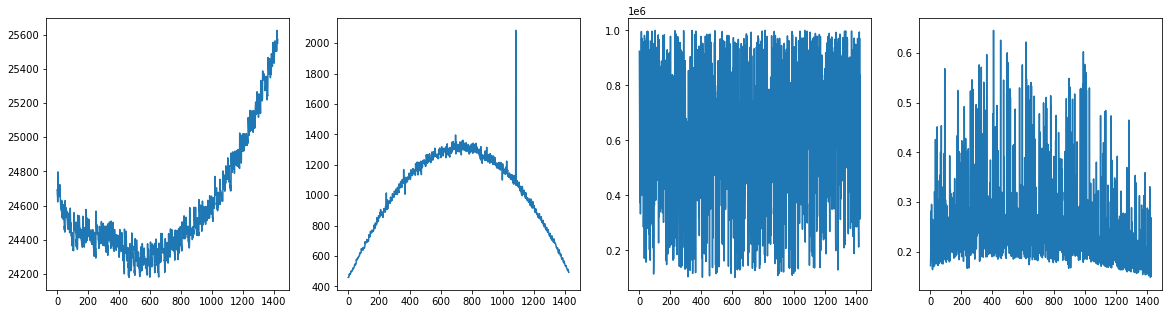

2018_06_25


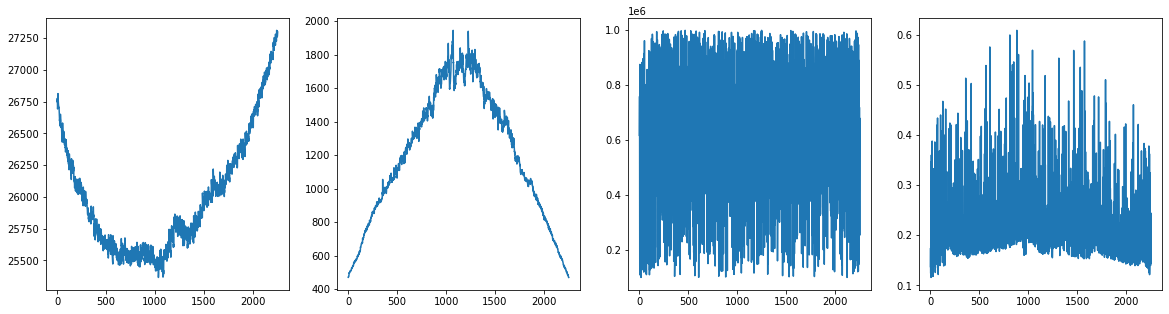

2018_11_02


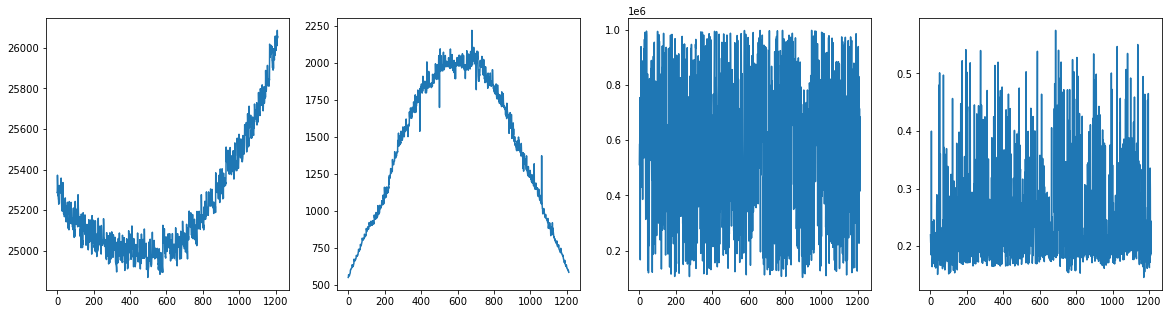

2018_03_01


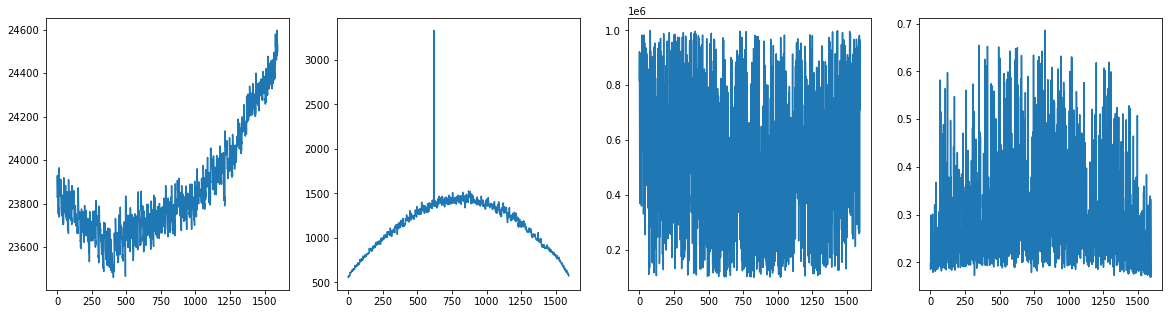

2018_04_18


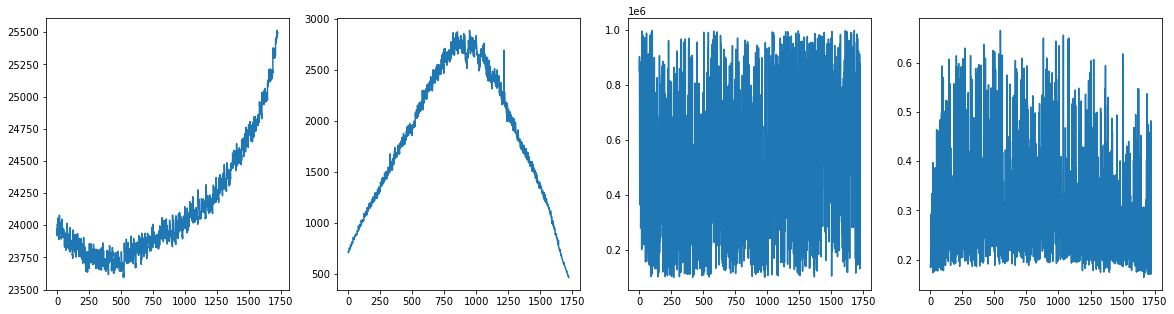

2018_09_23


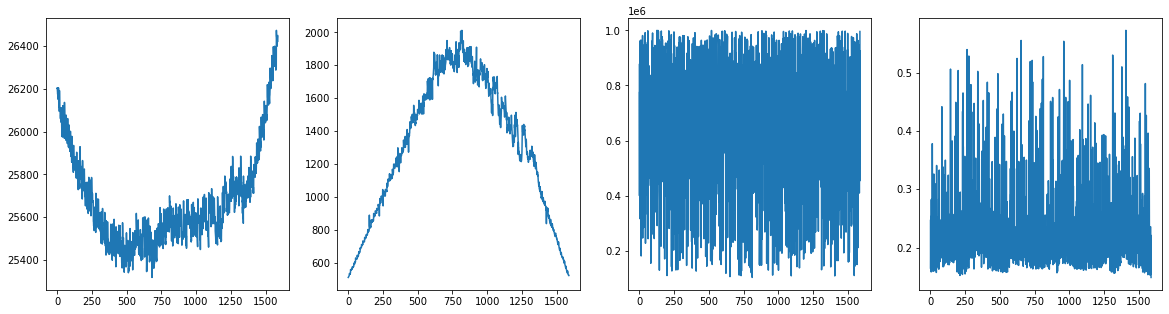

2018_06_11


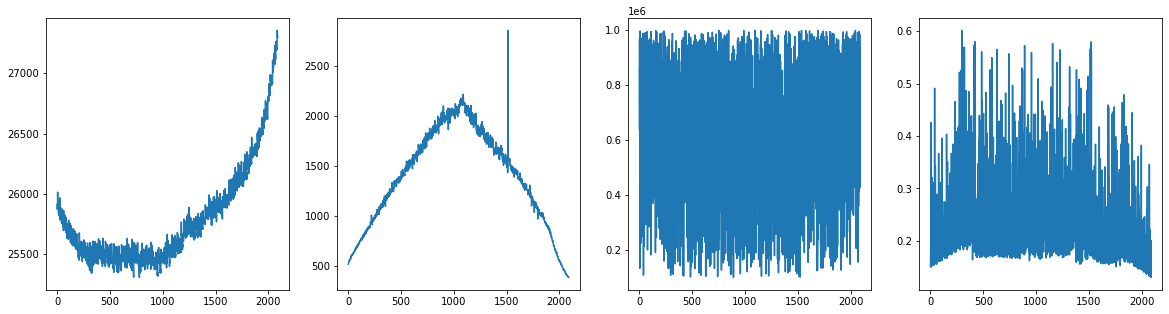

2018_09_18


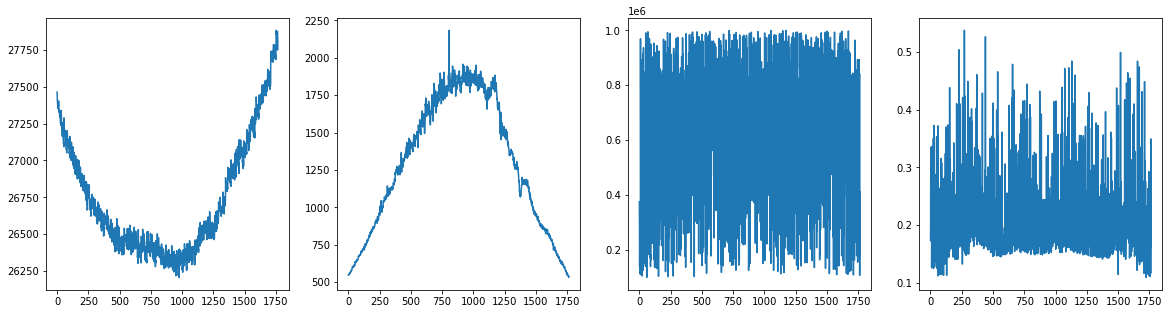

2018_06_22


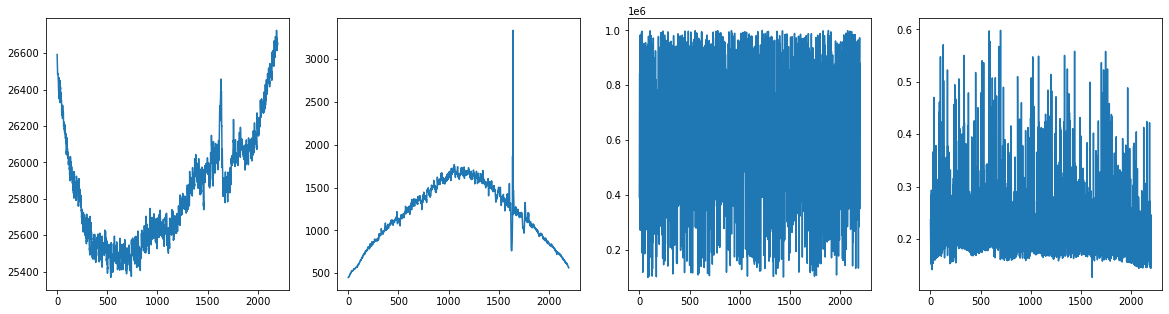

2018_04_09


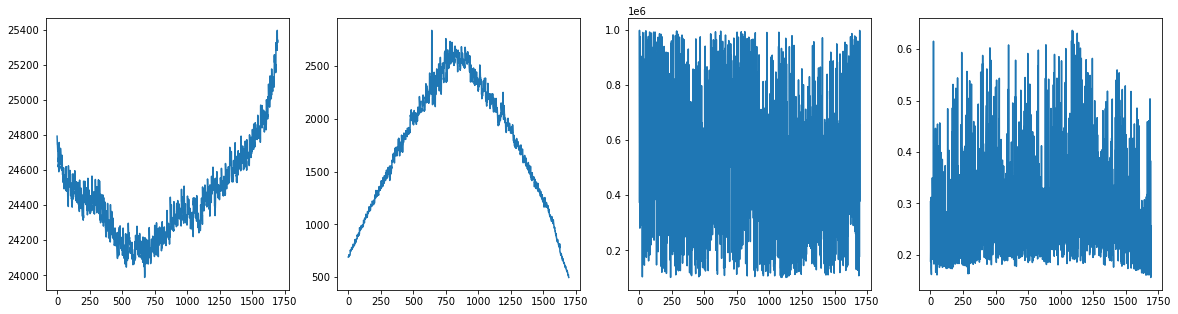

2018_11_05


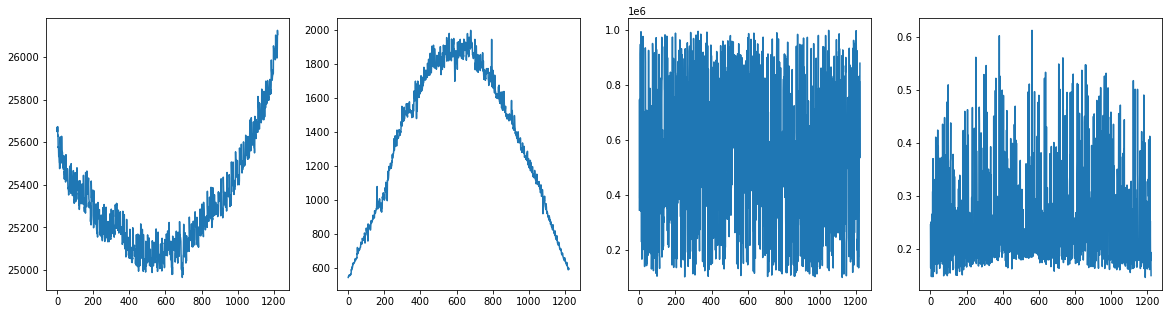

2018_03_03


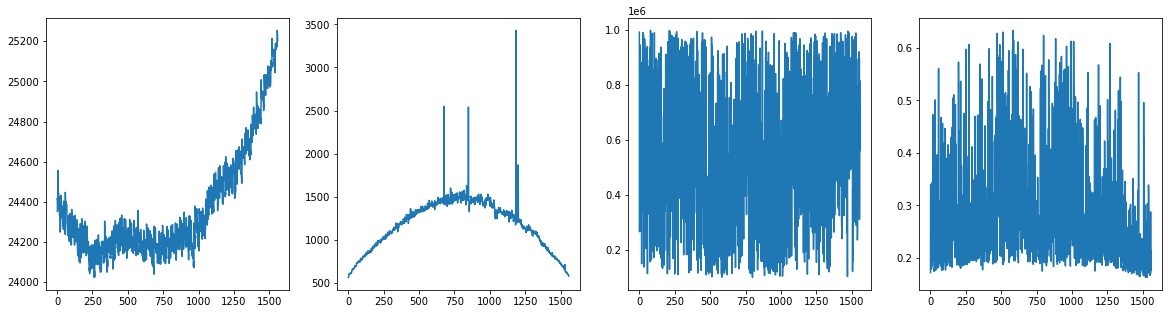

2018_07_21


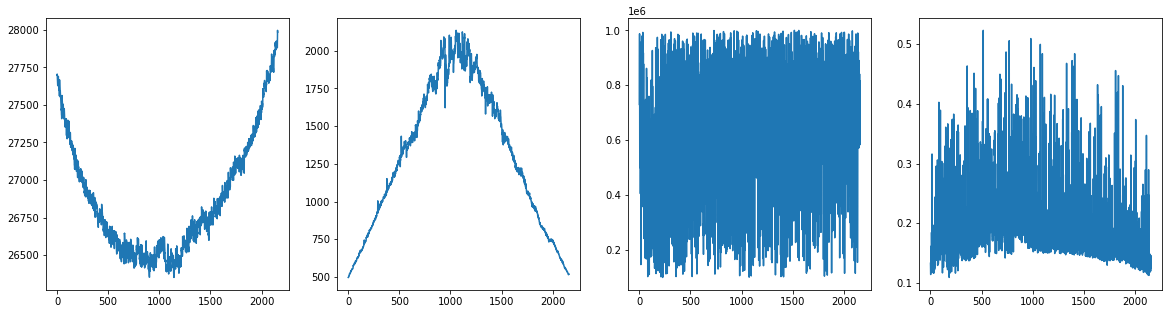

2018_02_26


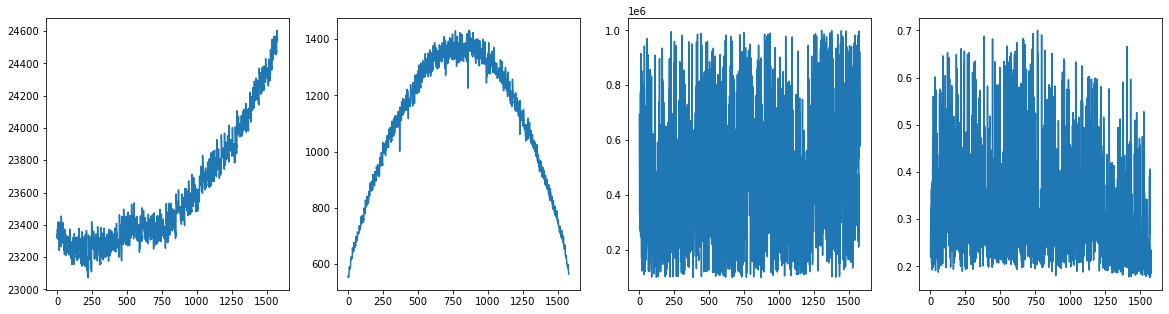

2018_09_15


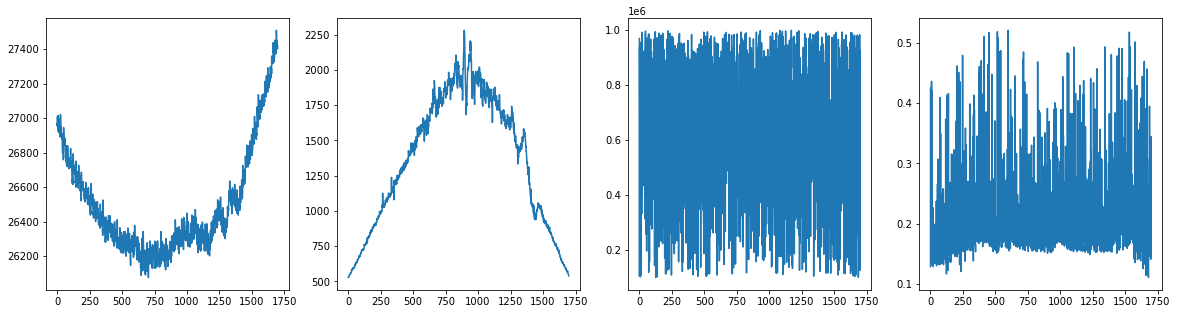

2018_01_24


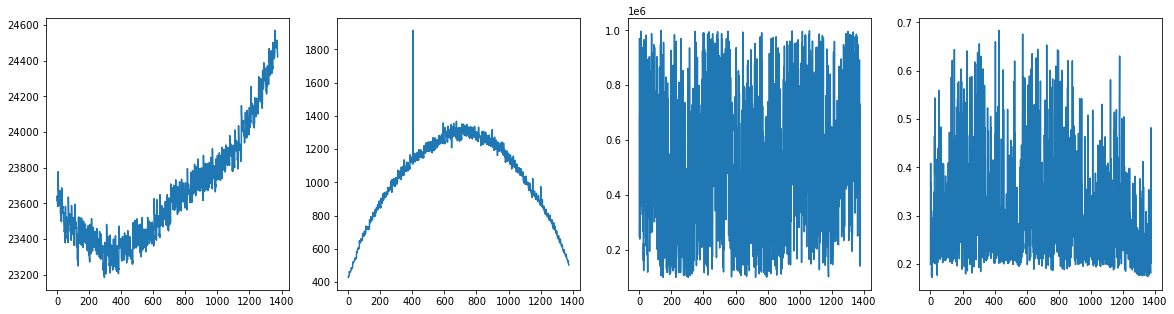

2017_12_12


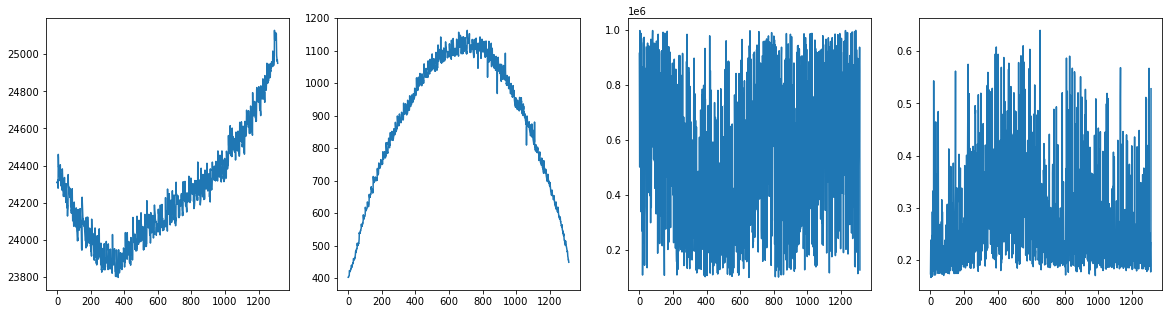

2017_12_19


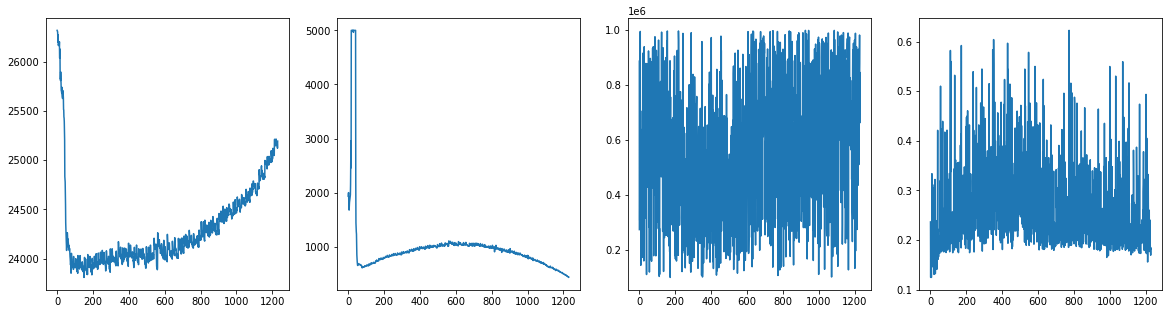

2018_01_13


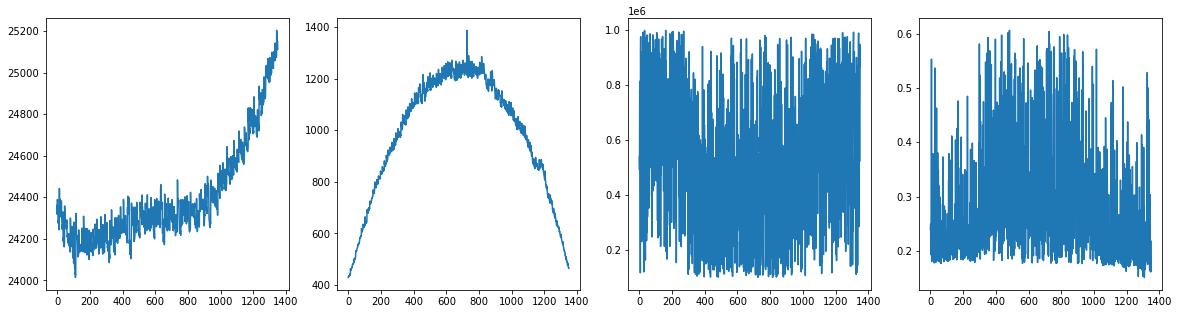

2018_04_23


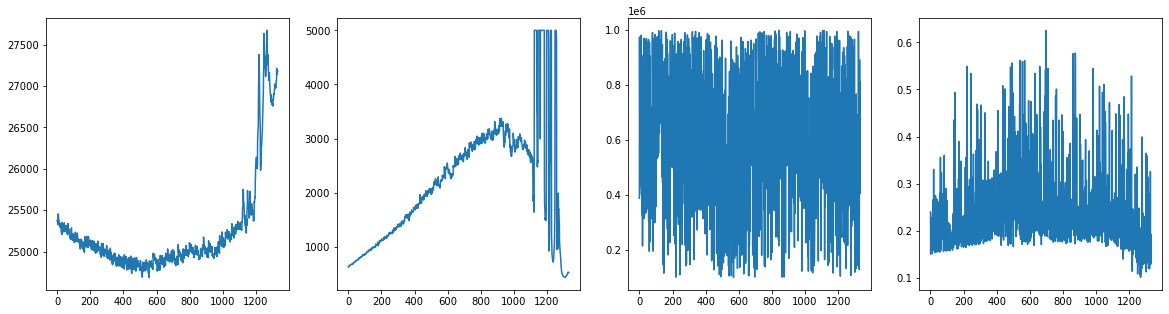

2017_12_08


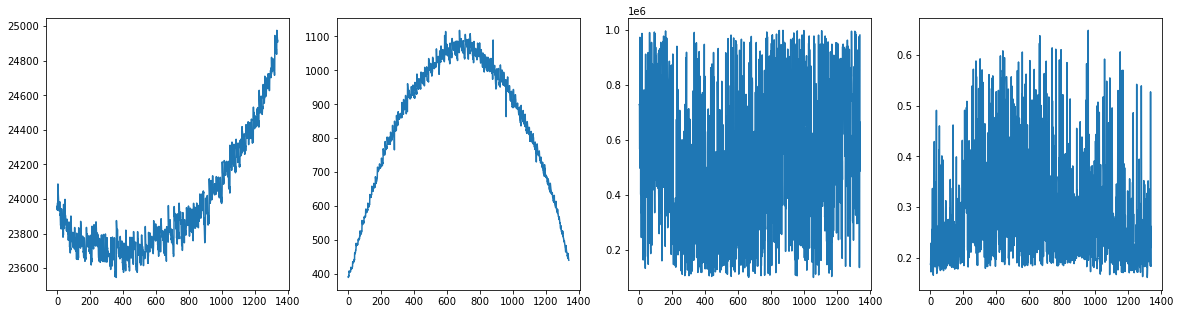

2017_12_20


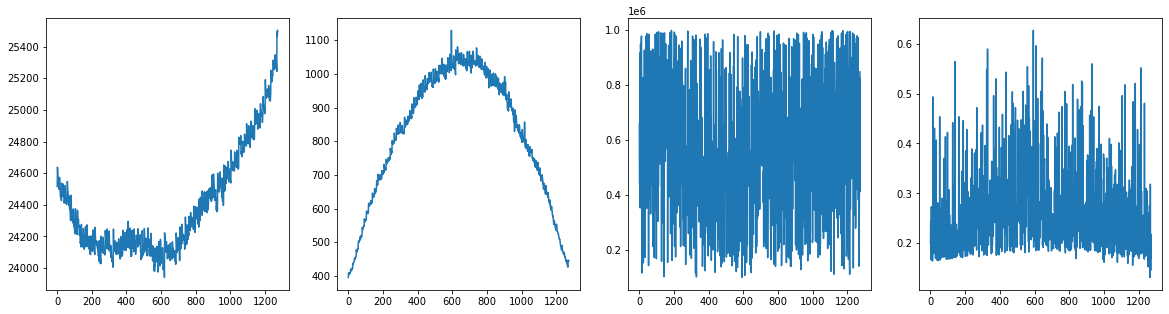

51 51 51 51
41 10 41 10 41 10 41 10


In [3]:
# Approximate the Parameters of the models with less error
def _select_samples(X_, Y_, e_, N_samples, tau_0 = 400, tau_1 = 800):
    m_   = np.sqrt(e_[:, 0]**2 + e_[:, 1]**2)
    idx_ = np.argsort(m_)[:N_samples]
    return X_[idx_, :], Y_[idx_, :]

# Select as covariate: Year, Year Day, Temp air, Temp Dew, Pressure, Humidity, elevation Azimuth
def _select_dimensions(x_, idx_):
    return x_[:, idx_]

# Load Data from a pickle
def _load_data(file):
    with open(file, 'rb') as f:
        X = pickle.Unpickler(f).load()
    return X

def _split_train(X_, Y_, U_, T_, n_test):
    np.random.seed(0)
    idx_ = np.random.permutation(len(X_))
    X_tr_ = [X_[i] for i in idx_[:-n_test]]
    X_ts_ = [X_[i] for i in idx_[-n_test:]]
    Y_tr_ = [Y_[i] for i in idx_[:-n_test]]
    Y_ts_ = [Y_[i] for i in idx_[-n_test:]]
    U_tr_ = [U_[i] for i in idx_[:-n_test]]
    U_ts_ = [U_[i] for i in idx_[-n_test:]]
    T_tr_ = [T_[i] for i in idx_[:-n_test]]
    T_ts_ = [T_[i] for i in idx_[-n_test:]]
    return X_tr_, X_ts_, Y_tr_, Y_ts_, U_tr_, U_ts_, T_tr_, T_ts_

# Select Covariates and Regressors
def _dataset(X_, Y_, cov_index_, reg_index_):
    return X_[:, cov_index_], Y_[:, reg_index_]

def _LS(X_, y_, l = 0):
    return np.matmul(np.linalg.inv(np.matmul(X_.T, X_) + l*np.identity(X_.shape[1])*X_.shape[0]), np.matmul(X_.T, y_))

def _predict(x_, w_):
    return np.matmul(x_, w_)

path = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\data\{}'
name = 'atmospheric_model_parameters_fitting_dataset_v1-1.pkl'
file = path.format(name)
print(file)
Cov_, Reg_, Mag_ = _load_data(file)
print(len(Cov_), len(Reg_), len(Mag_))
# Variables initialization
X_ = []
Y_ = []
U_ = []
date_ = []
# Index of days with artifacts
# idx_bad_days_ = set([6, 9, 12, 24, 28, 31, 38, 42, 48]
# idx_ = set(np.arange(len(Cov_), dtype = int)) ^ idx_bad_days_)
# Cov_ = [Cov_[i] for i in idx_]
# Reg_ = [Reg_[i] for i in idx_]
# Mag_ = [Mag_[i] for i in idx_]
# Loop over Covariate, regressors, and error magnitude per sample day
for x_, y_, e_ in zip(Cov_, Reg_, Mag_):
    # Select Samples with smallest error
    #x_, y_ = _select_samples(x_, y_, e_, N_samples = 3000)
    
    # Get Instant unix time and samples date
    unix_ = x_[:, 0]
    date = datetime.utcfromtimestamp(unix_[0]).strftime('%Y_%m_%d')
    date_.append(date)
    print(date)
    
    # Select Dimentsions
    x_ = _select_dimensions(x_, idx_ = [4, 3, 6, 7, 8, 9, 10, 11])
    
    y_prime_ = np.diff(y_[:, 1])
    sigma = np.std(y_prime_)/5.
    idx_ = (y_prime_ < sigma ) & (y_prime_ > - sigma)
    #idx_ = (y_[1:, 2] < 0.05) & (y_[1:, 2] > - 0.05)
    
    plt.figure(figsize = (20, 5))
    plt.subplot(141)
    plt.plot(y_[1:, 0][idx_])
    plt.subplot(142)
    plt.plot(y_[1:, 1][idx_])
    plt.subplot(143)
    plt.plot(y_[1:, 2][idx_])
    plt.subplot(144)
    plt.plot(y_[1:, -1][idx_])
    plt.show()
    
    # Append samples for training model
    X_.append(x_[1:, :][idx_])
    Y_.append(y_[1:, :][idx_])
    U_.append(unix_[1:][idx_])

print(len(X_), len(Y_), len(U_), len(date_))

X_tr_, X_ts_, Y_tr_, Y_ts_, U_tr_, U_ts_, T_tr_, T_ts_ = _split_train(X_, Y_, U_, date_, n_test = 10)
print(len(X_tr_), len(X_ts_), len(Y_tr_), len(Y_ts_), len(U_tr_), len(U_ts_), len(T_tr_), len(T_ts_))

In [8]:
def _fit_model(X_tr_, Y_tr_, degree, alpha, cov_index_, reg_index_):
    # Get Dataset
    x_tr_, y_tr_ = _dataset(np.concatenate((X_tr_), axis = 0), np.concatenate((Y_tr_), axis = 0), cov_index_, reg_index_)
    print(x_tr_[0, :])
    x_tr_poly_   = PolynomialFeatures(degree).fit_transform(x_tr_)
    # Fit Model
    return _LS(x_tr_poly_, y_tr_, alpha), degree, alpha

def _test_model(X_ts_, Y_ts_, w_,degree, cov_index_, reg_index_):
    # Get Dataset
    x_ts_, y_ts_ = _dataset(np.concatenate((X_ts_), axis = 0), np.concatenate((Y_ts_), axis = 0), cov_index_, reg_index_)
    x_ts_poly_   = PolynomialFeatures(degree).fit_transform(x_ts_)
    # Pridict    
    y_ts_hat_ = _predict(x_ts_poly_, w_)
    plt.figure()
    plt.plot(y_ts_)
    plt.plot(y_ts_hat_)
    plt.show()
    rmse = np.sqrt(mean_squared_error(y_ts_, y_ts_hat_))
    r2   = r2_score(y_ts_, y_ts_hat_)  
    print(rmse, r2)
    return rmse, r2

def _compute_mean(X_tr_, Y_tr_, reg_index_):
    # Get Dataset
    x_tr_ = np.concatenate((X_tr_), axis = 0)
    y_tr_ = np.concatenate((Y_tr_), axis = 0)
    # Display Histrogram
    plt.figure()
    plt.hist(y_tr_[:, reg_index_], 50)
    plt.show()
    # Compute Average
    return np.mean(y_tr_[:, reg_index_])

[  2.00416667 -10.21805556  17.88711159]


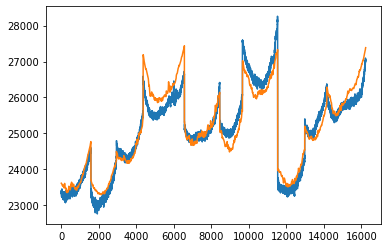

340.6760193461999 0.9112792969639986
[343.          17.88711159 136.66894145]


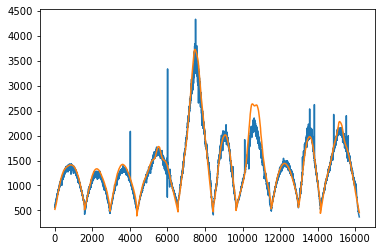

137.5444275688334 0.9414272216942826


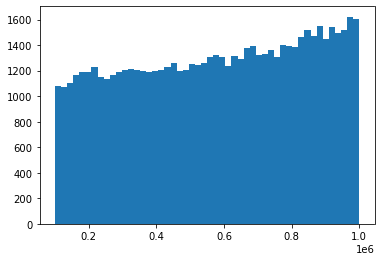

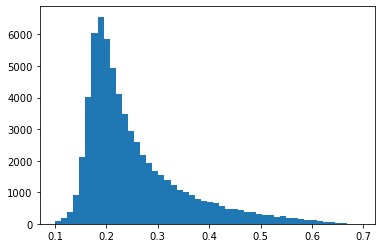

In [8]:
# Model v1-1
# cov_index_ = [2, 3, 6]
# reg_index_ = [0]
# degree_0 = 2
# alpha_0  = 1e-14

# cov_index_ = [0, 6, 7]
# reg_index_ = [1]
# degree_1 = 6
# alpha_1  = 100000.

w_0_, degree_0, alpha_0 = _fit_model(X_tr_, Y_tr_, degree = 2, alpha = 1e-14, cov_index_ = [2, 3, 6] , reg_index_ = [0])
rmse_0, r_0 = _test_model(X_ts_, Y_ts_, w_ = w_0_, degree = 2, cov_index_ = [2, 3, 6] , reg_index_ = [0])
w_1_, degree_1, alpha_1 = _fit_model(X_tr_, Y_tr_, degree = 6, alpha = 100000., cov_index_ = [0, 6, 7] , reg_index_ = [1])
rmse_1, r_1 = _test_model(X_ts_, Y_ts_, w_ = w_1_, degree = 6, cov_index_ = [0, 6, 7] , reg_index_ = [1])

# # Models mean-Parameters
w_3 = _compute_mean(X_tr_, Y_tr_, reg_index_ = [2])
w_4 = _compute_mean(X_tr_, Y_tr_, reg_index_ = [3])
# Models files names
m_name = r'atmospheric_parameters_model_v1-1.pkl'
m_ = [[w_0_, degree_0], [w_1_, degree_1], w_3, w_4]

[349.          17.84497481   1.51388889  52.25       137.25730069]


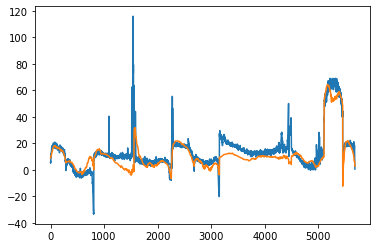

7.716744551261606 0.7200132165401492
[3.26250000e+04 1.37257301e+02 1.78449748e+01 3.49000000e+02]


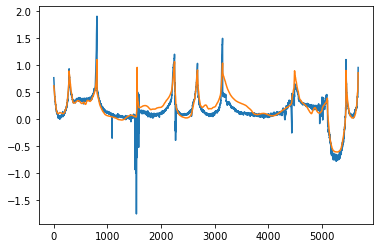

0.12635618100101956 0.7833614250751789
[  1.51388889 349.          -7.23611111 137.25730069  17.84497481]


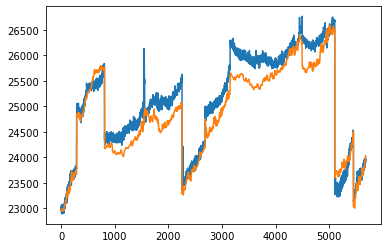

312.2856559016528 0.8957891073003637


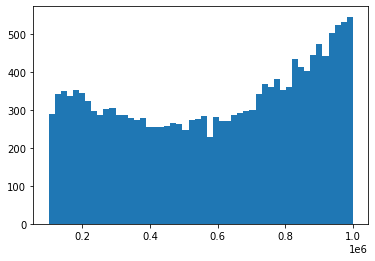

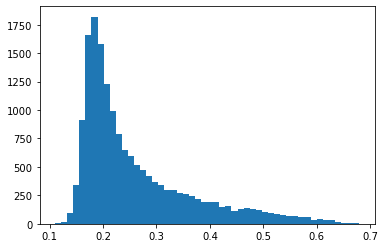

In [11]:
# Model v2-1
# cov_index_ = [0, 6, 2, 5, 7] 
# reg_index_ = [0]
# degree_0 = 4
# alpha_0  = 10000000.0

# cov_index_ = [1, 7, 6, 0] 
# reg_index_ = [1]
# degree_0 = 4
# alpha_0  = 100000.

# cov_index_ = [2, 0, 3, 7, 6]
# reg_index_ = [4]
# degree_0 = 2
# alpha_0  = 1e-6

# Models LS-Parameters
w_0_, degree_0, alpha_0 = _fit_model(X_tr_, Y_tr_, degree = 4, alpha = 10000000.0, cov_index_ = [0, 6, 2, 5, 7] , reg_index_ = [0])
rmse_0, r_0 = _test_model(X_ts_, Y_ts_, w_ = w_0_, degree = 4, cov_index_ = [0, 6, 2, 5, 7] , reg_index_ = [0])
w_1_, degree_1, alpha_1 = _fit_model(X_tr_, Y_tr_, degree = 4, alpha = 100000., cov_index_ = [1, 7, 6, 0] , reg_index_ = [1])
rmse_1, r_1 = _test_model(X_ts_, Y_ts_, w_ = w_1_, degree = 4, cov_index_ = [1, 7, 6, 0] , reg_index_ = [1])
w_4_, degree_4, alpha_4 = _fit_model(X_tr_, Y_tr_, degree = 2, alpha = 1e-6, cov_index_ = [2, 0, 3, 7, 6], reg_index_ = [4])
rmse_4, r_4 = _test_model(X_ts_, Y_ts_, w_ = w_4_, degree = 2, cov_index_ = [2, 0, 3, 7, 6] , reg_index_ = [4])

# Models mean-Parameters
w_2 = _compute_mean(X_tr_, Y_tr_, reg_index_ = [2])
w_3 = _compute_mean(X_tr_, Y_tr_, reg_index_ = [3])
# Models files names
m_name = r'atmospheric_parameters_model_v2-1.pkl'
m_ = [[w_0_, degree_0], [w_1_, degree_1], w_2, w_3, [w_4_, degree_4]]

[346.         -13.38888889   3.24045139  17.95928034]


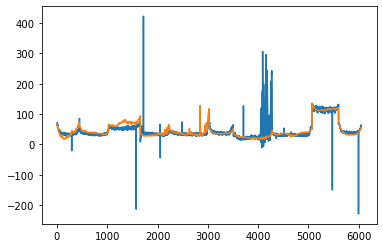

20.943949394957983 0.5018688916404628
[346.           3.24045139  17.95928034  28.296875  ]


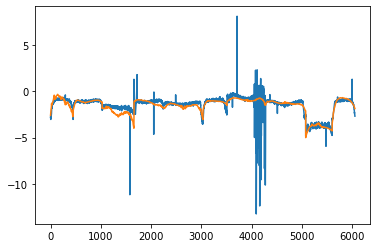

0.7978355828082061 0.4681276279677393
[3.46000000e+02 1.79592803e+01 3.25350000e+04 2.82968750e+01
 1.37144598e+02]


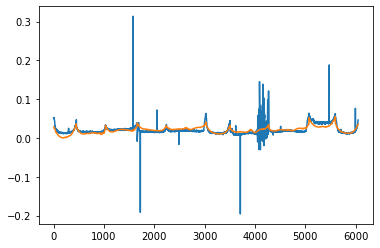

0.011087682457696995 0.328913023395488
[  3.24045139 346.         -13.38888889 137.14459822  17.95928034]


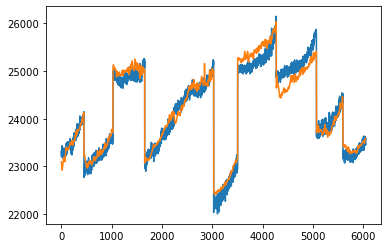

187.17072515078954 0.9575350682136778


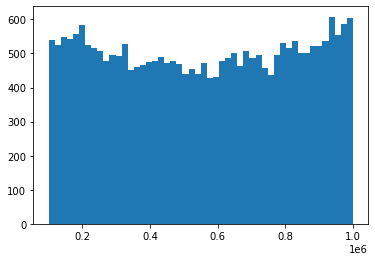

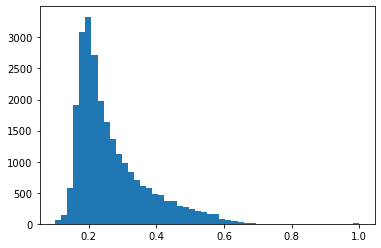

In [14]:
# Model v2-2
# cov_index_ = [0, 3, 2, 6] 
# reg_index_ = [0]
# degree_0 = 4
# alpha_0  = 1e-16

# cov_index_ = [0, 2, 6, 5] 
# reg_index_ = [1]
# degree_0 = 4
# alpha_0  = 10.

# cov_index_ = [0, 6, 1, 5, 7] 
# reg_index_ = [2]
# degree_0 = 3
# alpha_0  = 10

# cov_index_ = [2, 0, 3, 7, 6]
# reg_index_ = [5]
# degree_0 = 2
# alpha_0  = 1e-6

# Models Parameters
w_0_, degree_0, alpha_0 = _fit_model(X_tr_, Y_tr_, degree = 4, alpha = 1e-16, cov_index_ = [0, 3, 2, 6] , reg_index_ = [0])
rmse_0, r_0 = _test_model(X_ts_, Y_ts_, w_ = w_0_, degree = 4, cov_index_ = [0, 3, 2, 6] , reg_index_ = [0])

w_1_, degree_1, alpha_1 = _fit_model(X_tr_, Y_tr_, degree = 4, alpha = 10., cov_index_ = [0, 2, 6, 5] , reg_index_ = [1])
rmse_1, r_1 = _test_model(X_ts_, Y_ts_, w_ = w_1_, degree = 4, cov_index_ = [0, 2, 6, 5] , reg_index_ = [1])

w_2_, degree_2, alpha_2 = _fit_model(X_tr_, Y_tr_, degree = 3, alpha = 10, cov_index_ = [0, 6, 1, 5, 7], reg_index_ = [2])
rmse_2, r_2 = _test_model(X_ts_, Y_ts_, w_ = w_2_, degree = 3, cov_index_ = [0, 6, 1, 5, 7] , reg_index_ = [2])

w_5_, degree_5, alpha_5 = _fit_model(X_tr_, Y_tr_, degree = 2, alpha = 1e-6, cov_index_ = [2, 0, 3, 7, 6], reg_index_ = [5])
rmse_5, r_5 = _test_model(X_ts_, Y_ts_, w_ = w_5_, degree = 2, cov_index_ = [2, 0, 3, 7, 6] , reg_index_ = [5])

# Models mean-Parameters
w_3 = _compute_mean(X_tr_, Y_tr_, reg_index_ = [3])
w_4 = _compute_mean(X_tr_, Y_tr_, reg_index_ = [4])
# Models files names
m_name = r'atmospheric_parameters_model_v2-2.pkl'
m_ = [[w_0_, degree_0], [w_1_, degree_1], [w_2_, degree_2], w_3, w_4, [w_5_, degree_5]]

In [15]:
# Group down together the entired dataset in predictions and covariates
def _save_file(X_, name):
    with open(name, 'wb') as f:
        pickle.dump(X_, f)
    print(name)
    
# Models files names
#m_name = r'atmospheric_parameters_model_v5.pkl'
#m_ = [[[w_0_, degree_0], [w_1_, degree_1]], [w_2, w_3]]

# Software path directories
root_path   = r'C:\Users\Guille\Desktop'
method_path = r'{}\troposphere_radiometry_model'.format(root_path)
model_path  = r'{}\models'.format(method_path)
# Atmospheric models paramters
_save_file(m_, name = '{}\{}'.format(model_path, m_name))

C:\Users\Guille\Desktop\troposphere_radiometry_model\models\atmospheric_parameters_model_v2-2.pkl


# Performance of Atmoshperic Radiometric Parameters Model 

241.22340412092433 0.951927445436041


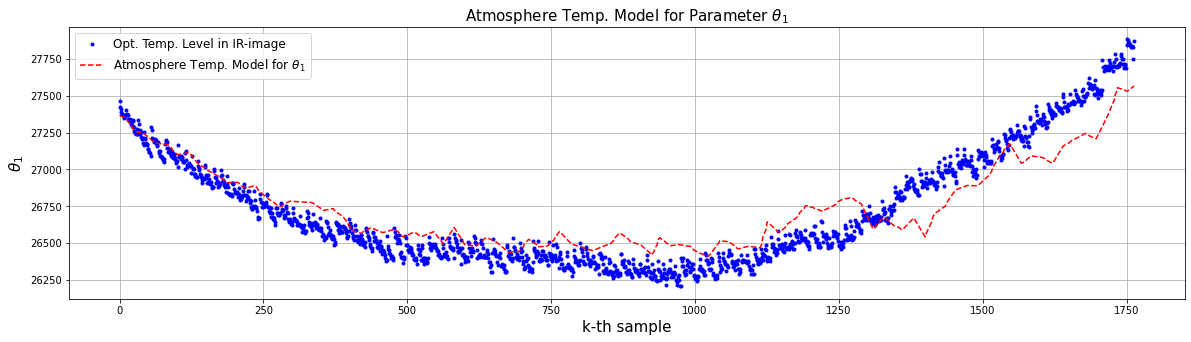

2018_09_18 163.90709098945553 0.8264735633615374


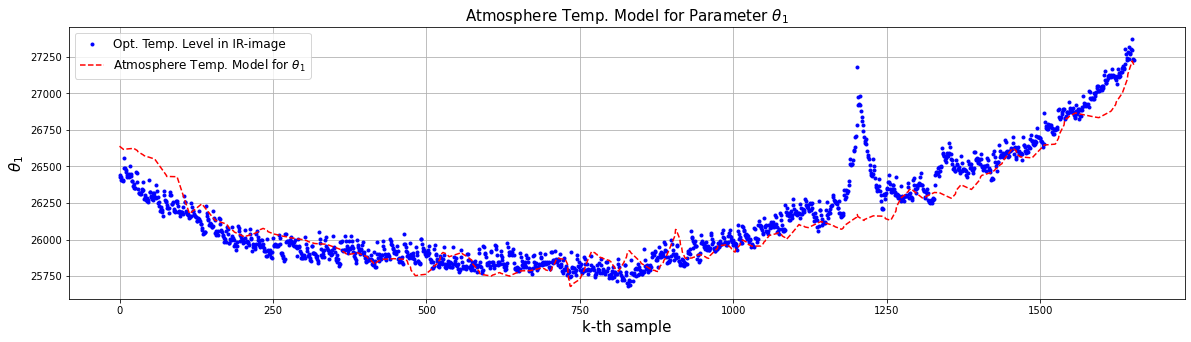

2018_09_13 143.04362439940311 0.846267102128134


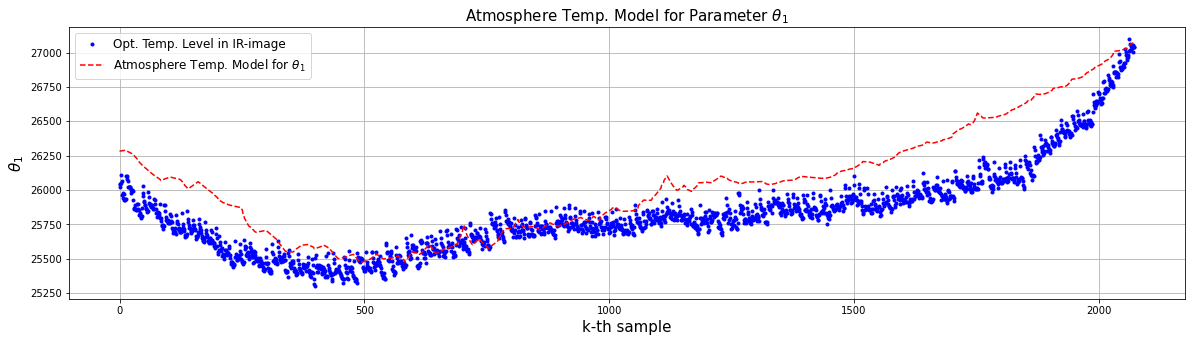

2018_06_12 257.7846816066164 0.3508708366629434


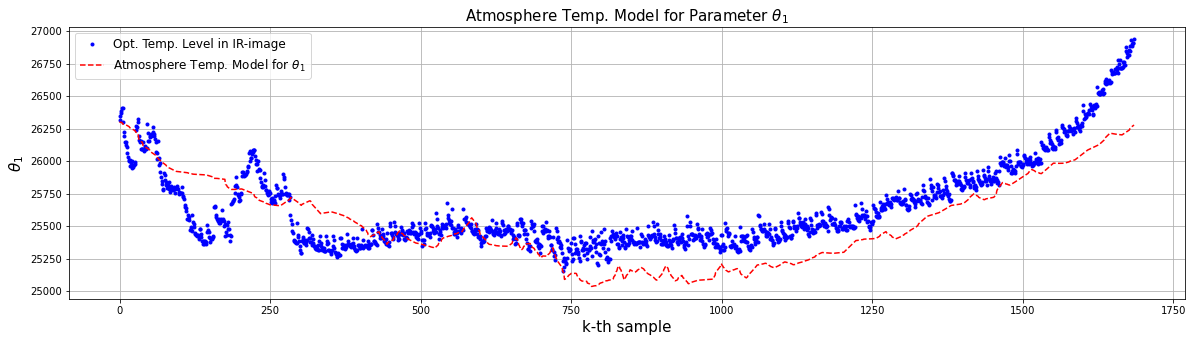

2018_05_23 234.82052558615592 0.5259448664709643


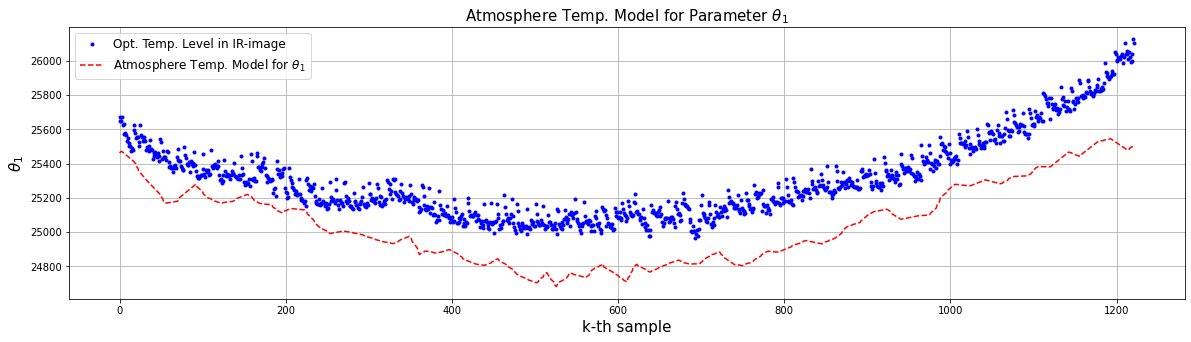

2018_11_05 275.83201890937534 -0.3225385040076272


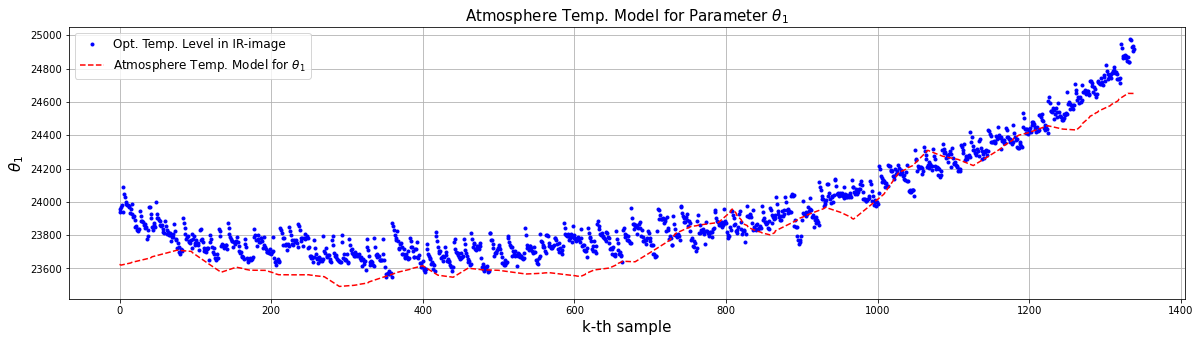

2017_12_08 141.09477577822767 0.7987925439260856


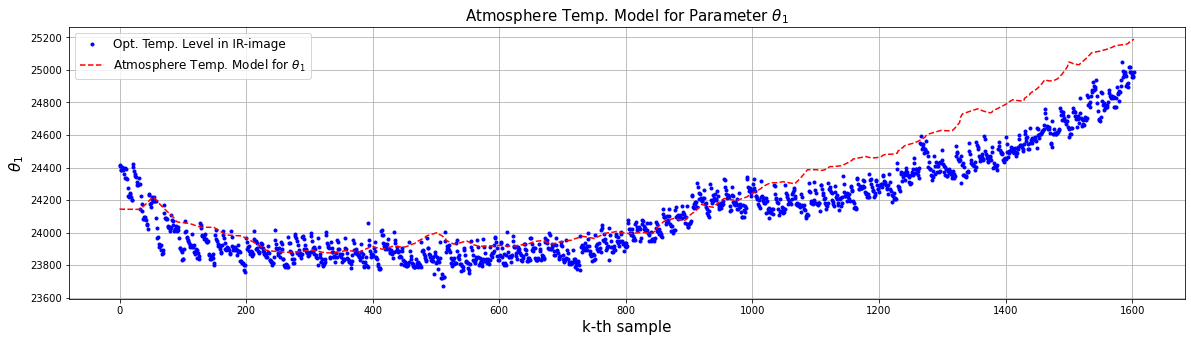

2018_03_04 167.8715104828631 0.6787381251216382


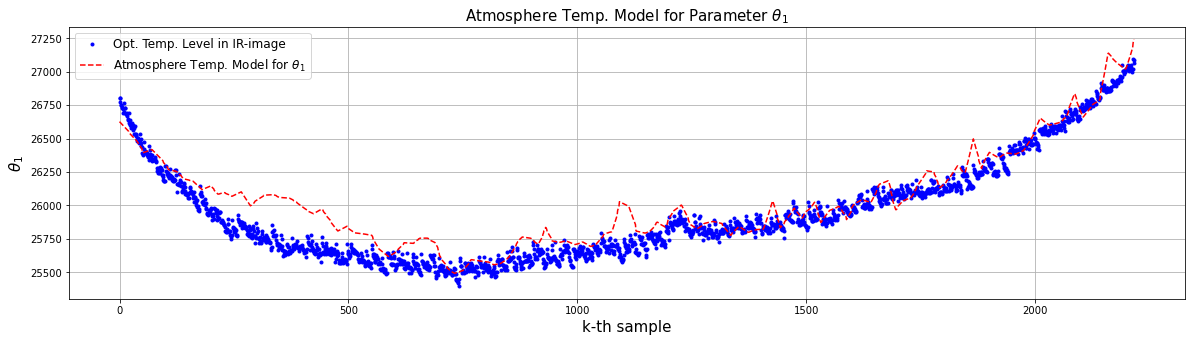

2018_07_01 146.3361704311125 0.849137827961441


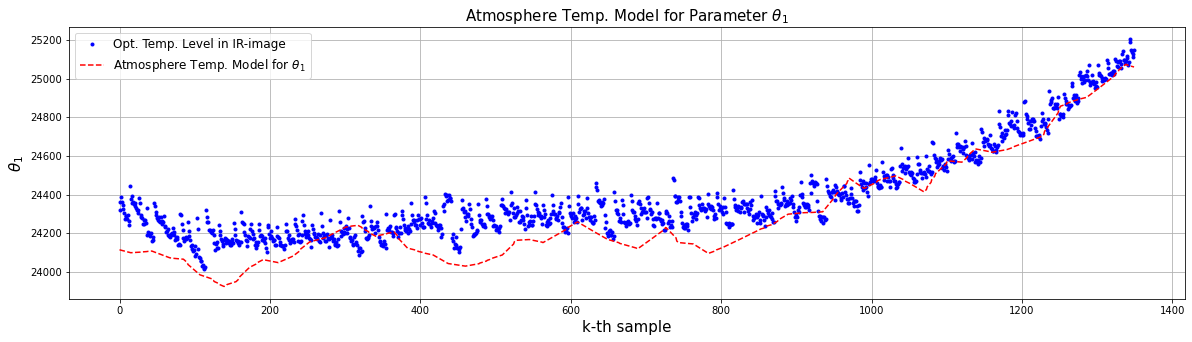

2018_01_13 133.90868977644982 0.6908883216228401


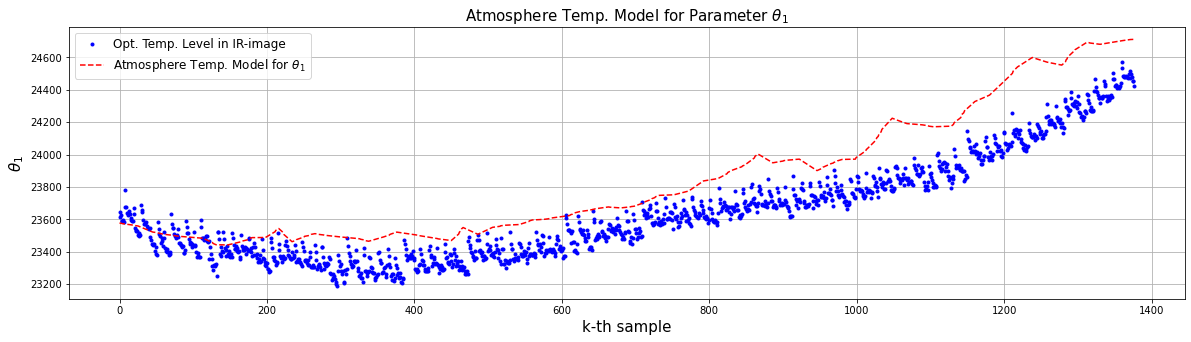

2018_01_24 232.98534036262515 0.4415432156897343
189.75844283222847
0.568611789893769


In [15]:
# RMS = 156.17809124089547, alpha = 1e-05, degree = 2
# R2 = 0.6324990497776556, alpha = 1e-05, degree = 2
# Second of the day, year, air temperature, dew temperature, atmospheric presure, humidity
cov_index_ = [2, 3, 6]
reg_index_ = [0]
degree_0 = 2
alpha_0  = 1e-14

# Get Dataset
x_tr_, y_tr_ = _dataset(np.concatenate((X_tr_), axis = 0), np.concatenate((Y_tr_), axis = 0), cov_index_, reg_index_)
x_tr_poly_   = PolynomialFeatures(degree_0).fit_transform(x_tr_)

# Fit Model
w_0_      = _LS(x_tr_poly_, y_tr_, alpha_0)
y_tr_hat_ = _predict(x_tr_poly_, w_0_)

# Training Error
mse_tr_ = np.sqrt(mean_squared_error(y_tr_, y_tr_hat_))
r2_tr_  = r2_score(y_tr_, y_tr_hat_) 
print(mse_tr_, r2_tr_)
               
# Test Variables Initialization
mse_ts_ = np.zeros((len(X_ts_)))
r2_ts_  = np.zeros((len(X_ts_)))

# Loop Over training samples
for i in range(len(X_ts_)):
    # Get Dataset     
    x_ts_, y_ts_ = _dataset(X_ts_[i], Y_ts_[i], cov_index_, reg_index_)
    x_ts_poly_ = PolynomialFeatures(degree_0).fit_transform(x_ts_)
    # Predict
    y_ts_hat_ = _predict(x_ts_poly_, w_0_)
    
    plt.figure(figsize = (20, 5))
    plt.plot(y_ts_, '.', color = 'blue', label = r'Opt. Temp. Level in IR-image')
    plt.plot(y_ts_hat_, '--', color = 'red', label = r'Atmosphere Temp. Model for $\theta_1$')
    plt.title(r'Atmosphere Temp. Model for Parameter $\theta_1$', fontsize = 15)
    plt.xlabel(r'k-th sample', fontsize = 15)
    plt.ylabel(r'$\theta_1$', fontsize = 15)
    plt.legend(fontsize = 12)
    plt.grid()
    plt.show()

    mse_ts_[i] = np.sqrt(mean_squared_error(y_ts_, y_ts_hat_))
    r2_ts_[i]  = r2_score(y_ts_, y_ts_hat_)    
    print(T_ts_[i], mse_ts_[i], r2_ts_[i])

# Test scores
print(np.mean(mse_ts_, axis = 0))
print(np.mean(r2_ts_, axis = 0))

241.5356555752544 0.8581684509213588


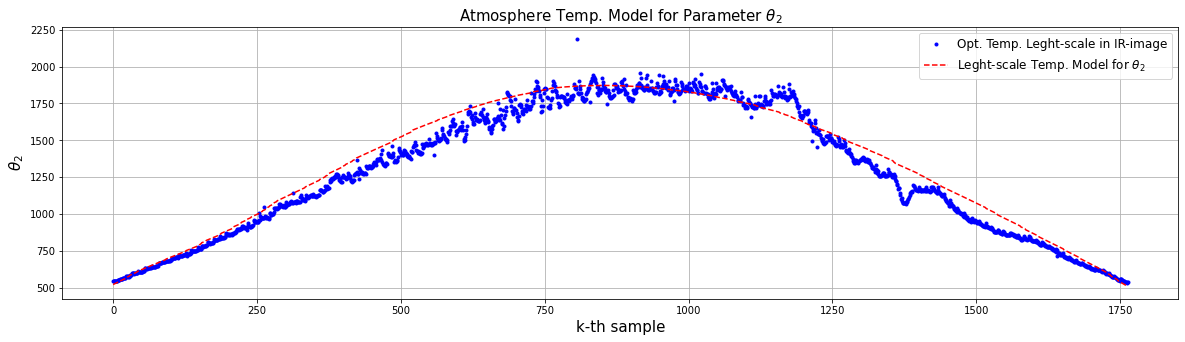

2018_09_18 82.52950791509534 0.9642597966164629


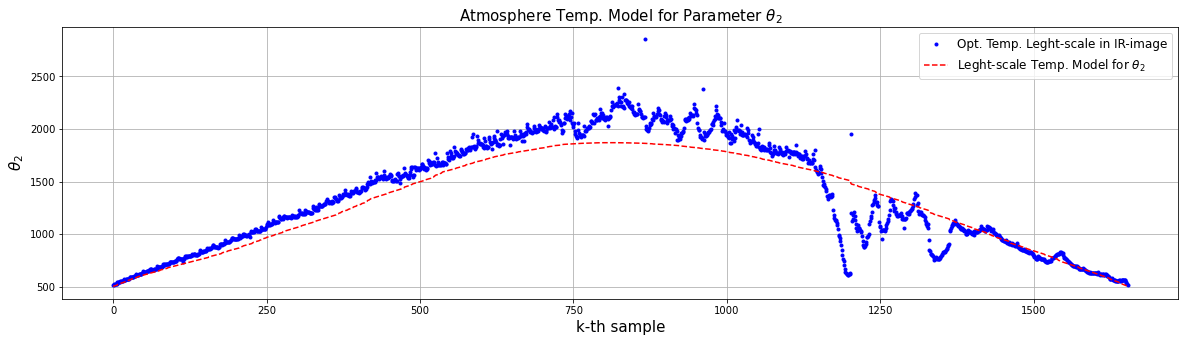

2018_09_13 191.84366037907742 0.8655497322709229


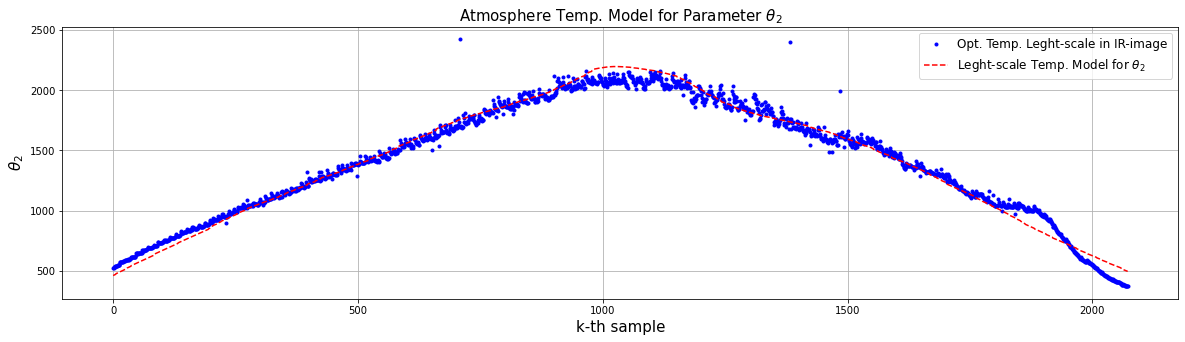

2018_06_12 66.94730579349147 0.9806924104608619


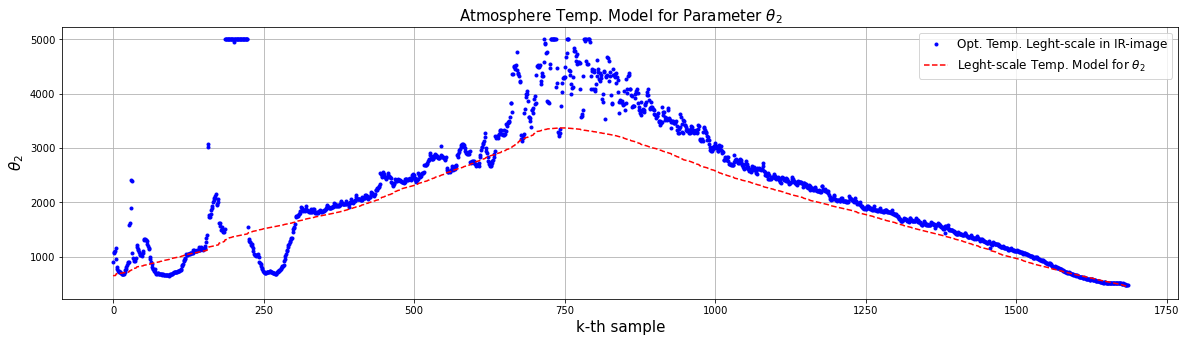

2018_05_23 726.3931451342614 0.6388245853731693


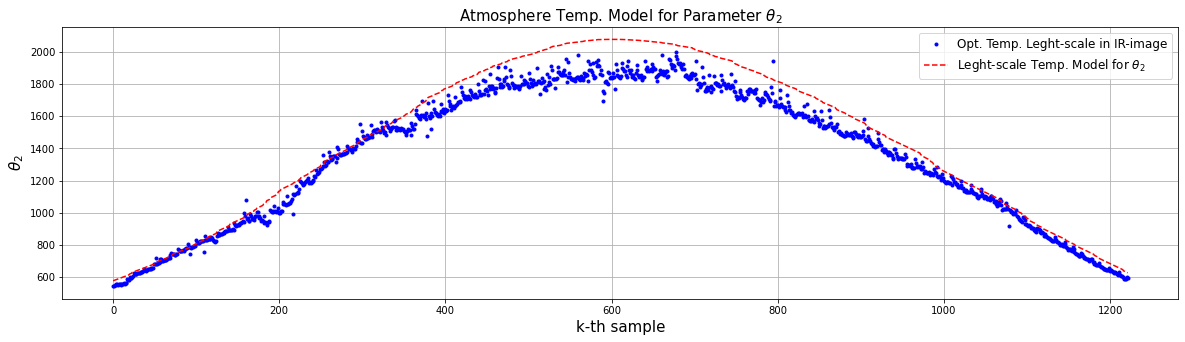

2018_11_05 115.66524217619663 0.9251523818236846


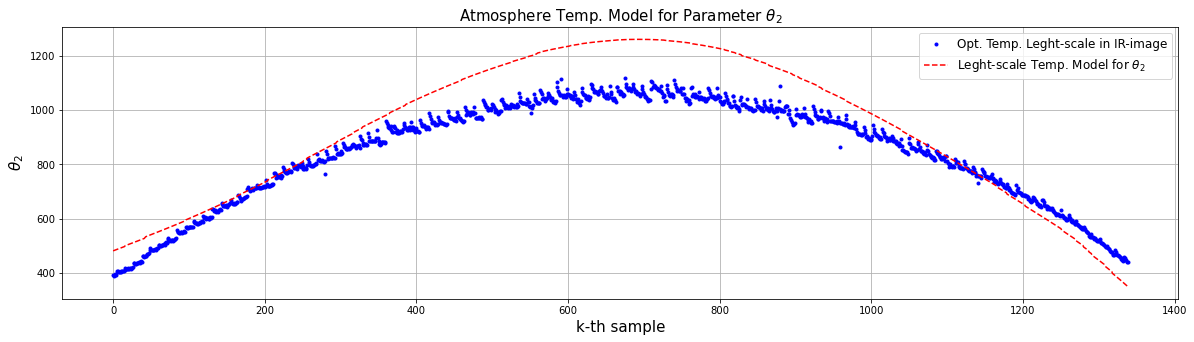

2017_12_08 115.02912008338096 0.6416910600556095


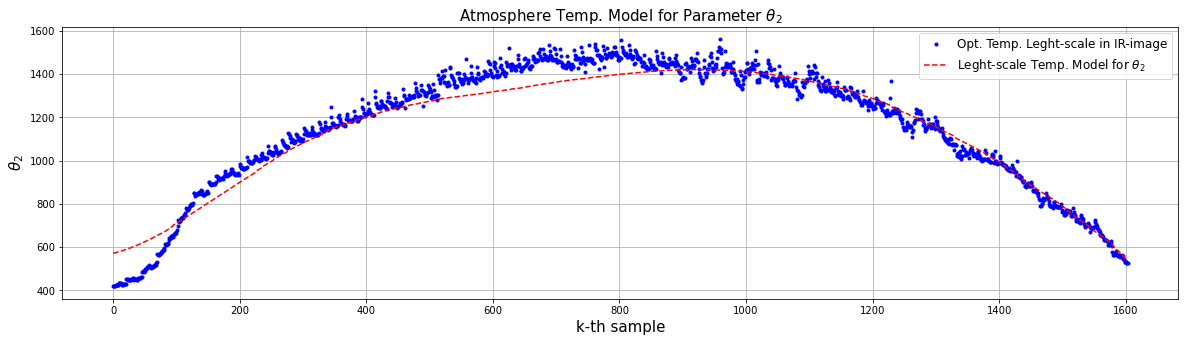

2018_03_04 63.51392528042379 0.9536362827551911


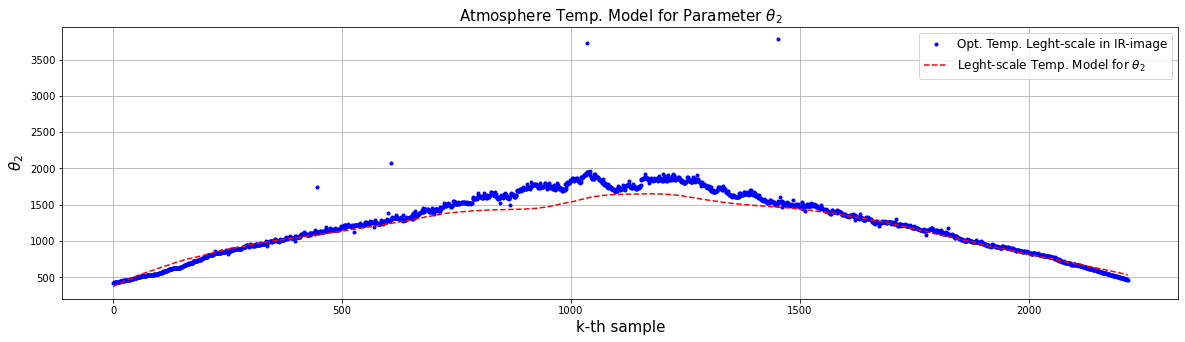

2018_07_01 139.56210147592324 0.8927766348452888


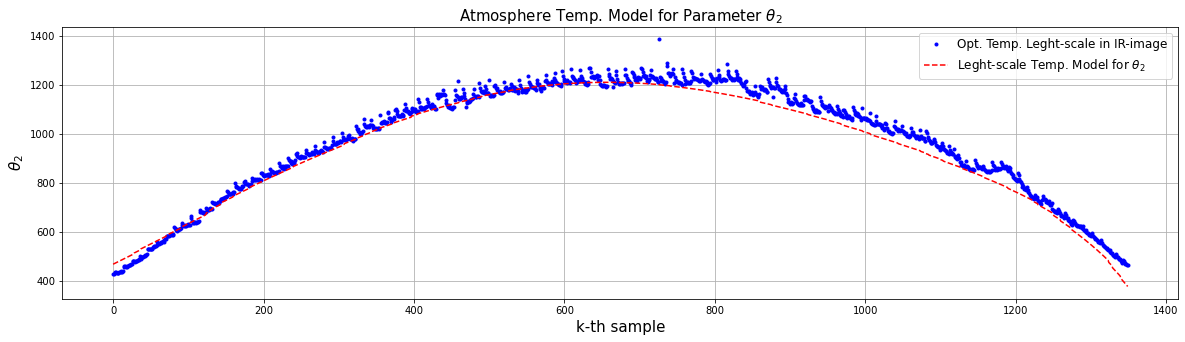

2018_01_13 39.24635396096422 0.9719123201868353


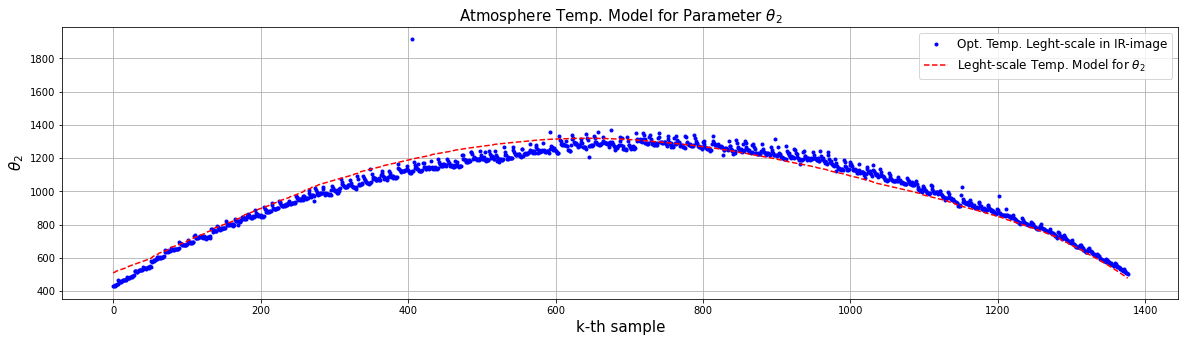

2018_01_24 50.37766822821245 0.9562177505645763
159.11080304270268
0.8790712954952602


In [6]:
# RMSE = 363.22383599927906, alpha =  3.162277660168379e-13, degree = 4
# R2 = 0.3200100225557375, alpha = 3.162277660168379e-13, degree = 4
#322.6233586029795 10.0 5
#0.4020536219822915 10.0 5
# 358.89287473241757 1e-08 5
# 0.3627050603025932 1e-08 5
# Second of the day, year, air temperature, dew temperature, atmospheric presure, humidity
cov_index_ = [0, 6, 7]
reg_index_ = [1]
degree_1 = 6
alpha_1  = 100000.

# Get Dataset
x_tr_, y_tr_ = _dataset(np.concatenate((X_tr_), axis = 0), np.concatenate((Y_tr_), axis = 0), cov_index_, reg_index_)
x_tr_poly_   = PolynomialFeatures(degree_1).fit_transform(x_tr_)

# Fit Model
w_1_ = _LS(x_tr_poly_, y_tr_, alpha_1)
y_tr_hat_ = _predict(x_tr_poly_, w_1_)

# Training Error
mse_tr_ = np.sqrt(mean_squared_error(y_tr_, y_tr_hat_))
r2_tr_  = r2_score(y_tr_, y_tr_hat_) 
print(mse_tr_, r2_tr_)
       
# Test Variables Initialization
mse_ts_ = np.zeros((len(X_ts_)))
r2_ts_  = np.zeros((len(X_ts_)))

# Loop Over training samples
for i in range(len(X_ts_)):
    # Get Dataset
    x_ts_, y_ts_ = _dataset(X_ts_[i], Y_ts_[i], cov_index_, reg_index_)
    x_ts_poly_ = PolynomialFeatures(degree_1).fit_transform(x_ts_)
    # Pridict    
    y_ts_hat_ = _predict(x_ts_poly_, w_1_)

    plt.figure(figsize = (20, 5))
    plt.plot(y_ts_, '.', color = 'blue', label = r'Opt. Temp. Leght-scale in IR-image')
    plt.plot(y_ts_hat_, '--', color = 'red', label = r'Leght-scale Temp. Model for $\theta_2$')
    plt.title(r'Atmosphere Temp. Model for Parameter $\theta_2$', fontsize = 15)
    plt.xlabel(r'k-th sample', fontsize = 15)
    plt.ylabel(r'$\theta_2$', fontsize = 15)
    plt.legend(fontsize = 12)
    plt.grid()
    plt.show()
    
    mse_ts_[i] = np.sqrt(mean_squared_error(y_ts_, y_ts_hat_))
    r2_ts_[i]  = r2_score(y_ts_, y_ts_hat_)  
    print(T_ts_[i], mse_ts_[i], r2_ts_[i])

# Test scores
print(np.mean(mse_ts_, axis = 0))
print(np.mean(r2_ts_, axis = 0))

(7, 4) (4,)
[0 2 4 6]
[0 1 1 2]


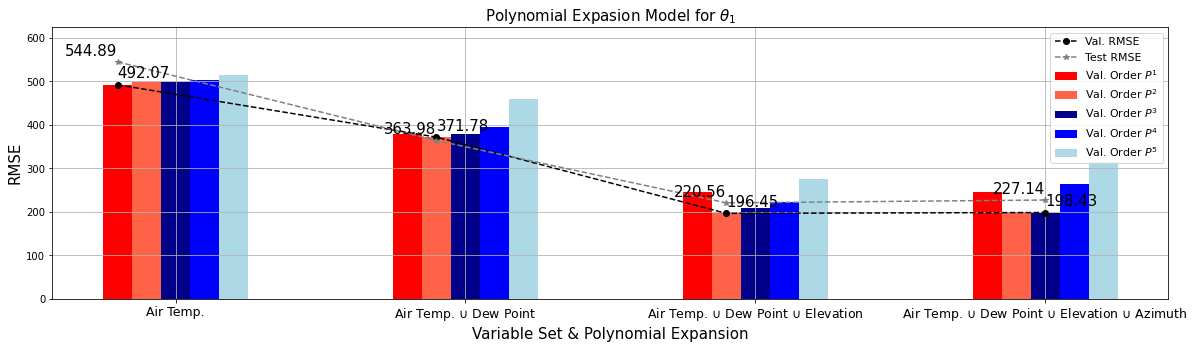

In [3]:
x_1_ = np.array([492.06616854, 499.09462245, 497.81949532, 503.61559755, 513.62880296, 529.14917494, 523.43358894])[..., np.newaxis]
x_2_ = np.array([378.87690415, 371.78431604, 378.80484498, 394.41193642, 459.12602829, 490.95038823, 458.30198544])[..., np.newaxis]
x_3_ = np.array([245.23361099, 196.44998202, 209.35082423, 222.49414075, 276.24480453, 308.86559532, 359.90810649])[..., np.newaxis]
x_4_ = np.array([246.39038123, 198.65333224, 198.42766631, 263.55430474, 315.00514263, 553.08795229, 943.16250754])[..., np.newaxis]
x_ = np.concatenate((x_1_, x_2_, x_3_, x_4_), axis = 1)
y_ = np.array([492.06616853840745, 371.7843160357093, 196.4499820241585, 198.4276663097278])
z_ = np.array([544.885342882076, 363.9795328976621, 220.55516584530983, 227.13524651284274])
print(x_.shape, y_.shape)

width = 0.2

model_ = np.arange(0, 8, 2)
y_argmin_ = np.argmin(x_, axis = 0)
print(model_)
print(y_argmin_)

w_ = [-0.4, 1.8, 3.8, 6.]

plt.figure(figsize = (20, 5))
plt.bar(model_ - 2*width, x_[0, :], width, label = r'Val. Order $P^1$', color = 'red')
plt.bar(model_ - 1*width, x_[1, :], width, label = r'Val. Order $P^2$', color = 'tomato')
plt.bar(model_, x_[2, :], width, label = r'Val. Order $P^3$', color = 'darkblue')
plt.bar(model_ + 1*width, x_[3, :], width, label = r'Val. Order $P^4$', color = 'blue')
plt.bar(model_ + 2*width, x_[4, :], width, label = r'Val. Order $P^5$', color = 'lightblue')

plt.plot(w_, y_, '--o', color = 'black', label = 'Val. RMSE')
plt.plot(w_, z_, '--*', color = 'gray', label = 'Test RMSE')

for w, y, z in zip(w_, y_, z_):
    plt.text(w, y + 15, r'{}'.format(np.around(y, decimals = 2)), ha = "left", fontsize = 15)
    plt.text(w, z + 15, r'{}'.format(np.around(z, decimals = 2)), ha = "right", fontsize = 15)

plt.legend(loc = 'upper right', ncol = 1, fontsize = 11)
plt.ylim((0, 625))
plt.xticks(np.arange(0., 8., 2.), [r'Air Temp.', r'Air Temp. $\cup$ Dew Point', r'Air Temp. $\cup$ Dew Point $\cup$ Elevation', 
                                     r'Air Temp. $\cup$ Dew Point $\cup$ Elevation $\cup$ Azimuth'], fontsize = 12.5)
plt.xlabel(r'Variable Set & Polynomial Expansion', fontsize = 15)
plt.ylabel(r'RMSE', fontsize = 15)
plt.title(r'Polynomial Expasion Model for $\theta_1$', fontsize = 15)
plt.grid()
plt.show()

[509.44315184 186.11087079 143.14350788] (3,) (7, 3)
[0 2 4]
[6 6 5]


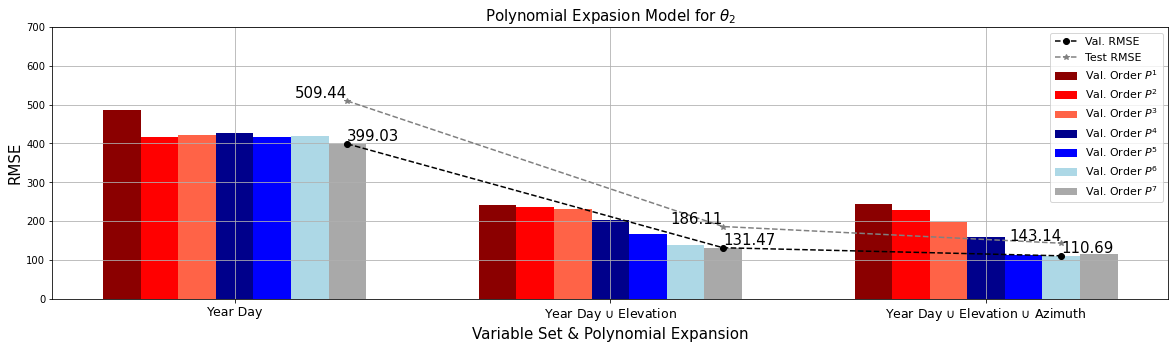

In [4]:
x_1_ = np.array([486.86764549, 416.67103583, 421.72034534, 426.16633468, 416.29420507, 419.29375524, 399.03103604])[..., np.newaxis]
x_2_ = np.array([241.30501081, 235.44022455, 231.10854856, 203.99689434, 166.71867838, 139.73999089, 131.47235523])[..., np.newaxis]
x_3_ = np.array([243.48860237, 228.31723157, 197.63248342, 158.01793145, 112.26064541, 110.69423535, 115.66412828])[..., np.newaxis]
x_ = np.concatenate((x_1_, x_2_, x_3_), axis = 1)
y_ = np.array([399.0310360388769, 131.47235522593132, 110.69423534605784])
z_ = np.array([509.4431518367205, 186.11087078520043, 143.14350788202626])
print(z_, y_.shape, x_.shape)

width = 0.2

model_ = np.arange(0, 6, 2)
y_argmin_ = np.argmin(x_, axis = 0)
print(model_)
print(y_argmin_)
w_ = [0.6, 2.6, 4.4]

plt.figure(figsize = (20, 5))
plt.bar(model_ - 3*width, x_[0, :], width, label = r'Val. Order $P^1$', color = 'darkred')
plt.bar(model_ - 2*width, x_[1, :], width, label = r'Val. Order $P^2$', color = 'red')
plt.bar(model_ - 1*width, x_[2, :], width, label = r'Val. Order $P^3$', color = 'tomato')
plt.bar(model_, x_[3, :], width, label = r'Val. Order $P^4$', color = 'darkblue')
plt.bar(model_ + 1*width, x_[4, :], width, label = r'Val. Order $P^5$', color = 'blue')
plt.bar(model_ + 2*width, x_[5, :], width, label = r'Val. Order $P^6$', color = 'lightblue')
plt.bar(model_ + 3*width, x_[6, :], width, label = r'Val. Order $P^7$', color = 'darkgray')

plt.plot(w_, y_, '--o', color = 'black', label = 'Val. RMSE')
plt.plot(w_, z_, '--*', color = 'gray', label = 'Test RMSE')

for w, y, z in zip(w_, y_, z_):
    plt.text(w, y + 7.5, r'{}'.format(np.around(y, decimals = 2)), ha = "left", fontsize = 15)
    plt.text(w, z + 7.5, r'{}'.format(np.around(z, decimals = 2)), ha = "right", fontsize = 15)

plt.legend(loc = 'upper right', ncol = 1, fontsize = 11)
plt.ylim((0, 700))
plt.xticks(np.arange(0., 6., 2.), [r'Year Day', r'Year Day $\cup$ Elevation', r'Year Day $\cup$ Elevation $\cup$ Azimuth'], fontsize = 12.5)
plt.xlabel(r'Variable Set & Polynomial Expansion', fontsize = 15)
plt.ylabel(r'RMSE', fontsize = 15)
plt.title(r'Polynomial Expasion Model for $\theta_2$', fontsize = 15)
plt.grid()
plt.show()

# Comparisson of Atmospheric Radiometric Models

In [81]:
# Load csv file
def _load_csv_file(path):
    return np.loadtxt(open(path, "rb"), delimiter = ",")
# Load infrared frame
def _load_infrared(file): 
    return imread(file, IMREAD_UNCHANGED)

def _index_test_days(T_ts_, name_):
    idx_ = [name_.index(i) for i in list(set(T_ts_).intersection(name_))]
    return idx_

def _index_test_frames(T_ts_, U_ts_, name_, time_, idx_):
    name_ir_ = [name_[i] for i in idx_]
    time_ir_ = [time_[i] for i in idx_]
    index_   = [name_ir_.index(name) for name in T_ts_]
    name_ir_ = [name_ir_[i] for i in index_]
    time_ir_ = [time_ir_[i] for i in index_]        
    idx_ = []
    for x_, y_ in zip(U_ts_, time_ir_):
        idx_.append(np.intersect1d(np.stack(x_), np.stack(y_), return_indices = True)[2])
    return index_, idx_

def _get_test_frames(image_, idx_days_, idx_sort_days_, idx_frames_):
    image_ir_ = [image_[i] for i in idx_days_]
    image_ir_ = [image_ir_[i] for i in idx_sort_days_]        
    I_ = []
    for X_, idx_ in zip(image_ir_, idx_frames_):
        I_.append(np.concatenate([X_[i] for i in idx_], axis = 2))
    return I_

# Path to the original files recorded by device
path_ir = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera'
# List Inititialization
name_  = []
image_ = []
time_  = []
# loop over directory of infrared day folders
for file in os.listdir(path_ir):
    file_ir = '{}\{}'.format(path_ir, file)
    # Display current processing day
    print(file_ir)
    try:
        # Day-list Initialization
        i_ = []
        u_ = []
        # Loop over images in infrared folder
        for image_name in os.listdir(file_ir):
            # Define path to an infrared image
            path_image = '{}\{}'.format(file_ir, image_name)
            # Load and append image to day-list
            i_.append(_load_infrared(path_image)[..., np.newaxis])
            u_.append(np.array((int(image_name[:-6])))[..., np.newaxis])
        # load and append data to the lists
        name_.append(file)
        image_.append(i_)
        time_.append(u_)
    except:
        pass
    
print(len(name_), len(image_), len(time_))

idx_days_ = _index_test_days(T_ts_, name_)

idx_sort_days_, idx_frames_ = _index_test_frames(T_ts_, U_ts_, name_, time_, idx_days_)
print(len(idx_sort_days_), len(idx_frames_))

I_ts_ = _get_test_frames(image_, idx_days_, idx_sort_days_, idx_frames_)
print(len(I_ts_))

C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2017_12_08
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2017_12_09
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2017_12_12
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2017_12_13
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2017_12_15
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2017_12_19
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2017_12_20
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2018_01_01
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2018_01_11
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2018_01_12
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2018_01_13
C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera\2018_01_22
C:\Users\Guille\Desktop\troposphere_radiometry_model

In [82]:
# Load all variable in a pickle file
def _load_file(name):
    def __load_variable(files = []):
        while True:
            try:
                files.append(pickle.load(f))
            except:
                return files
    with open(name, 'rb') as f:
        files = __load_variable()
    return files

# Generate the atmospheric effect from the Sun frame position coordiantes and horizon angles
def _atmospheric_effect_v11(X_, Y_, x_0_, x_1_, I_, x_sun_, m_, i_sun_max, tau):
    # Obtaining coefficients for the athmospheric models from a polynomial model
    def __polynomial_model(x_, w_, degree):
        x_poly_ = PolynomialFeatures(degree).fit_transform(x_[np.newaxis, :])
        return np.squeeze( x_poly_ @ w_) 
    # Applying atmospheric models to estimate effects of scatter radiation on the images
    def __F(I_, w_):
        # What is the highest Temperature in the IR image?
        i_max = I_.max()
        # Scatter radiation Model
        f_1_ = w_[0] * np.exp( (Y_ - x_sun_[1]) / w_[1])
        # When there is direct radiation apply direct radiation model and scatter radiation model
        if i_max > tau:
            # Direct Radiation Model
            f_2_  = w_[2] * ( (w_[3]**2) / ( (X_ - x_sun_[0])**2 + (Y_- x_sun_[1])**2 + w_[3]**2 )**1.5 )
            # Combine Both Models
            f_ = f_1_ + f_2_
            # Regularization of the Maximum Direct Radiation in the Image
            f_[f_ > i_max] = i_max
            return f_
        # When there is not direct radiation apply only the scatter model
        else:
            return f_1_
    # Get Scatter Radiation Parameters
    w_0 = __polynomial_model(x_0_, w_ = m_[0][0], degree = m_[0][1])
    w_1 = __polynomial_model(x_1_, w_ = m_[1][0], degree = m_[1][1])
    # Regularization of the Atmosphere Backgroud Radiation inclination
    if w_1 < 550: w_1 = 550.
    # Get Direct Radiation Parameters
    w_2 = m_[2]
    w_3 = m_[3]
    # Atmospheric models parameters
    return __F(I_, w_ = [w_0, w_1, w_2, w_3])

# Generate the atmospheric effect from the Sun frame position coordiantes and horizon angles
def _atmospheric_effect_v21(X_, Y_, x_0_, x_1_, x_4_, I_, x_sun_, m_, i_sun_max, tau):
    # Obtaining coefficients for the athmospheric models from a polynomial model
    def __polynomial_model(x_, w_, degree):
        x_poly_ = PolynomialFeatures(degree).fit_transform(x_[np.newaxis, :])
        return np.squeeze( x_poly_ @ w_) 
    # Applying atmospheric models to estimate effects of scatter radiation on the images
    def __F(I_, w_):
        # What is the highest Temperature in the IR image?
        i_max = I_.max()
        # Scatter radiation Model
        f_1_ = w_[0]*Y_ + w_[1]*Y_**2
        # When there is direct radiation apply direct radiation model and scatter radiation model
        if i_max > tau:
            # Direct Radiation Model
            f_2_  = w_[2] * ( (w_[3]**2) / ( (X_ - x_sun_[0])**2 + (Y_ - x_sun_[1])**2 + w_[3]**2 )**1.5 )
            # Combine Both Models
            f_ = f_1_ + f_2_ + w_[4]
            # Regularization of the Maximum Direct Radiation in the Image
            f_[f_ > i_max] = i_max
            return f_
        # When there is not direct radiation apply only the scatter model
        else:
            return f_1_ +  w_[4]
    # Get Scatter Radiation Parameters
    w_0 = __polynomial_model(x_0_, w_ = m_[0][0], degree = m_[0][1])
    w_1 = __polynomial_model(x_1_, w_ = m_[1][0], degree = m_[1][1])
    # Get Direct Radiation Parameters
    w_2 = m_[2]
    w_3 = m_[3]
    # Get Throposhere Temperature
    w_4 = __polynomial_model(x_4_, w_ = m_[4][0], degree = m_[4][1])
    # Atmospheric models parameters
    return __F(I_, w_ = [w_0, w_1, w_2, w_3, w_4])

# Generate the atmospheric effect from the Sun frame position coordiantes and horizon angles
def _atmospheric_effect_v22(X_, Y_, x_0_, x_1_, x_2_, x_5_, I_, x_sun_, m_, i_sun_max, tau):
    # Obtaining coefficients for the athmospheric models from a polynomial model
    def __polynomial_model(x_, w_, degree):
        x_poly_ = PolynomialFeatures(degree).fit_transform(x_[np.newaxis, :])
        return np.squeeze( x_poly_ @ w_) 
    # Applying atmospheric models to estimate effects of scatter radiation on the images
    def __F(I_, w_):
        # What is the highest Temperature in the IR image?
        i_max = I_.max()
        # Scatter radiation Model
        f_1_ = w_[2]*Y_**3 + w_[1]*Y_**2 + w_[0]*Y_
        # When there is direct radiation apply direct radiation model and scatter radiation model
        if i_max > tau:
            # Direct Radiation Model
            f_2_  = w_[3] * ( (w_[4]**2) / ( (X_ - x_sun_[0])**2 + (Y_ - x_sun_[1])**2 + w_[4]**2 )**1.5 )
            # Combine Both Models
            f_ = f_1_ + f_2_ + w_[5]
            # Regularization of the Maximum Direct Radiation in the Image
            f_[f_ > i_max] = i_max
            return f_
        # When there is not direct radiation apply only the scatter model
        else:
            return f_1_ + w_[5]

    # Get Scatter Radiation Parameters
    w_0 = __polynomial_model(x_0_, w_ = m_[0][0], degree = m_[0][1])
    w_1 = __polynomial_model(x_1_, w_ = m_[1][0], degree = m_[1][1])
    w_2 = __polynomial_model(x_2_, w_ = m_[2][0], degree = m_[2][1])
    # Get Direct Radiation Parameters
    w_3 = m_[3]
    w_4 = m_[4]
    # Get Throposhere Temperature
    w_5 = __polynomial_model(x_5_, w_ = m_[5][0], degree = m_[5][1])
    # Atmospheric models parameters
    return __F(I_, w_ = [w_0, w_1, w_2, w_3, w_4, w_5])

# Find Sun coordinates on a given frame
def _sun_coordinates(I_, tau = 45057.):
    x_sun = 40.
    y_sun = 30.
    x_ = np.where(I_ >= tau)
    if x_[0].size != 0 and x_[1].size != 0:
        x_sun = np.mean(x_[1])
        y_sun = np.mean(x_[0])
    x_now_ = np.array((x_sun, y_sun))[:, np.newaxis]
    return x_now_

# Select Covariates and Regressors
def _dataset(X_, cov_index_, reg_index_):
    return X_[:, cov_index_]

m_11_name = r'atmospheric_parameters_model_v1-1.pkl'
m_21_name = r'atmospheric_parameters_model_v2-1.pkl'
m_22_name = r'atmospheric_parameters_model_v2-2.pkl'

path = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\models'

m_11_ = _load_file(name = '{}\{}'.format(path, m_11_name))[0]
m_21_ = _load_file(name = '{}\{}'.format(path, m_21_name))[0]
m_22_ = _load_file(name = '{}\{}'.format(path, m_22_name))[0]

tau = 33000.
i_sun_max = 45057.
N_x = 80
N_y = 60
X_, Y_ = np.meshgrid(np.linspace(0, N_x - 1, N_x), np.linspace(0, N_y - 1, N_y))

x_ts_ = np.concatenate((X_ts_), axis = 0)
print(x_ts_.shape)
i_ts_ = np.concatenate((I_ts_), axis = 2)
print(i_ts_.shape)

(6051, 8)
(60, 80, 6051)


(16224, 3) (16224, 3)


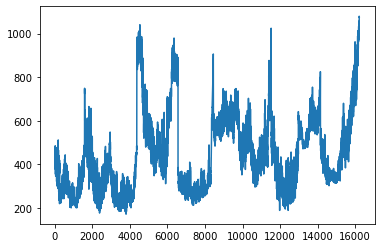

448.25501128050576 176.32105075153711


In [74]:
# Model v11
x_0_ = _dataset(x_ts_, cov_index_ = [2, 3, 6], reg_index_ = [0])
x_1_ = _dataset(x_ts_, cov_index_ = [0, 6, 7], reg_index_ = [1])
print(x_0_.shape, x_1_.shape)

N  = i_ts_.shape[-1]
E_ = np.zeros(N)

# Foor loop over images and covariates
for i in range(N):
    img_   = i_ts_[..., i]
    x_sun_ = _sun_coordinates(img_, tau = 45057.)
    Z_hat_ = _atmospheric_effect_v11(X_, Y_, x_0_[i, :], x_1_[i, :], img_, x_sun_, m_11_, i_sun_max, tau)

    e_ = img_.flatten() - Z_hat_.flatten()
    E_[i] = np.sqrt(np.mean((e_)**2))
    
plt.figure()
plt.plot(E_)
plt.show()

print(np.mean(E_), np.std(E_))

(5682, 5) (5682, 4) (5682, 5)


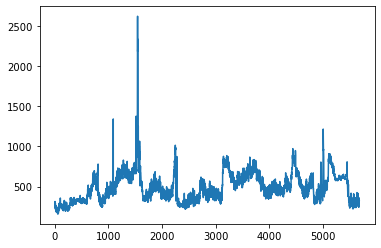

487.22668806769116 184.6580574572007


In [78]:
# Model v21
x_0_ = _dataset(x_ts_, cov_index_ = [0, 6, 2, 5, 7], reg_index_ = [0])
x_1_ = _dataset(x_ts_, cov_index_ = [1, 7, 6, 0], reg_index_ = [1])
x_4_ = _dataset(x_ts_, cov_index_ = [2, 0, 3, 7, 6], reg_index_ = [4])
print(x_0_.shape, x_1_.shape, x_4_.shape)

N  = i_ts_.shape[-1]
E_ = np.zeros(N)

# Foor loop over images and covariates
for i in range(N):
    img_   = i_ts_[..., i]
    x_sun_ = _sun_coordinates(img_, tau = 45057.)
    Z_hat_ = _atmospheric_effect_v21(X_, Y_, x_0_[i, :], x_1_[i, :], x_4_[i, :], img_, x_sun_, m_21_, i_sun_max, tau)

    e_ = img_.flatten() - Z_hat_.flatten()
    E_[i] = np.sqrt(np.mean((e_)**2))
    
plt.figure()
plt.plot(E_)
plt.show()

print(np.mean(E_), np.std(E_))

(6051, 4) (6051, 4) (6051, 5) (6051, 5)


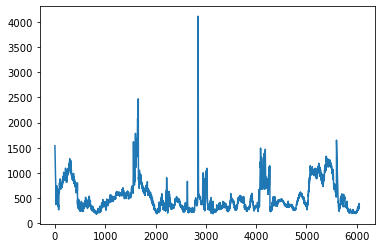

527.7601172666339 304.31863269170066


In [83]:
# Model v22
x_0_ = _dataset(x_ts_, cov_index_ = [0, 3, 2, 6], reg_index_ = [0])
x_1_ = _dataset(x_ts_, cov_index_ = [0, 2, 6, 5], reg_index_ = [1])
x_2_ = _dataset(x_ts_, cov_index_ = [0, 6, 1, 5, 7], reg_index_ = [2])
x_5_ = _dataset(x_ts_, cov_index_ = [2, 0, 3, 7, 6], reg_index_ = [5])
print(x_0_.shape, x_1_.shape, x_2_.shape, x_5_.shape)

N  = i_ts_.shape[-1]
E_ = np.zeros(N)

# Foor loop over images and covariates
for i in range(N):
    img_   = i_ts_[..., i]
    x_sun_ = _sun_coordinates(img_, tau = 45057.)
    Z_hat_ = _atmospheric_effect_v22(X_, Y_, x_0_[i, :], x_1_[i, :], x_2_[i, :], x_5_[i, :], img_, x_sun_, m_22_, i_sun_max, tau)

    e_ = img_.flatten() - Z_hat_.flatten()
    E_[i] = np.sqrt(np.mean((e_)**2))

plt.figure()
plt.plot(E_)
plt.show()

print(np.mean(E_), np.std(E_))

############################################### SCRATCH #####################################################

In [ ]:
# [0] [1]
# RMSE [583.80635524 504.99090327 512.62672756 518.00011879 505.44514773 506.69074011 485.16964302]
# RMSE 485.1696430172924 0.001 7
# RMSE 568.7119934505577
# RMSE 448.53671441531804
# [0, 6] [1]
# RMSE [320.24142801 319.91483304 306.82468323 283.66386229 249.42402183 232.10078339 222.65779115]
# RMSE 222.65779114502487 1e-05 7
# RMSE 280.33243541342534
# RMSE 139.33387555753612
# [0, 6, 7] [1]
# RMSE [321.37017746 314.39973911 275.88960473 244.53381274 215.75453592 209.56952324 212.61974053]
# RMSE 209.569523244903 100000.0 6
# RMSE 266.0011703374325
# RMSE 106.89229703840695

x_1_ = np.array([583.80635524, 504.99090327, 512.62672756, 518.00011879, 505.44514773, 506.69074011, 485.16964302])[..., np.newaxis]
x_2_ = np.array([320.24142801, 319.91483304, 306.82468323, 283.66386229, 249.42402183, 232.10078339, 222.65779115])[..., np.newaxis]
x_3_ = np.array([321.37017746, 314.39973911, 275.88960473, 244.53381274, 215.75453592, 209.56952324, 212.61974053])[..., np.newaxis]
x_ = np.concatenate((x_1_, x_2_, x_3_), axis = 1)
y_ = np.array([448.53671441531804, 139.33387555753612, 106.89229703840695])
z_ = np.array([485.1696430172924, 222.65779114502487, 209.569523244903])
print(y_.shape, x_.shape)

[0] [1]

R2 [-1.27539943 -0.18345588 -0.22996517 -0.30469035 -0.30107355 -0.32345685 -0.13099572]
RMSE [486.86764549, 416.67103583, 421.72034534, 426.16633468, 416.29420507, 419.29375524, 399.03103604]
R2 -0.13099572142008636 0.0001 7
RMSE 399.03103603887695 0.0001 7
R2 0.2988897417167814
RMSE 452.79433995371573
R2 -0.15132244227544553
RMSE 509.4431518367205

[0, 6] [1]

R2 [0.59957044 0.57168672 0.52092493 0.64623783 0.69691155 0.80001914 0.84405442]
RMSE [241.30501081, 235.44022455, 231.10854856, 203.99689434, 166.71867838, 139.73999089, 131.47235523]
R2 0.8440544211417021 100000.0 7
RMSE 131.47235522593132 100000.0 7
R2 0.9529284226184537
RMSE 117.32409275880336
R2 0.856626790158057
RMSE 186.11087078520043

[0, 6, 7] [1]

R2 [0.58984182 0.6154478  0.66169272 0.73884843 0.84490136 0.86856786 0.86182236]
RMSE [243.48860237, 228.31723157, 197.63248342, 158.01793145, 112.26064541, 110.69423535, 115.66412828]
R2 0.8685678560107027 100000.0 6
RMSE 110.69423534605784 100000.0 6
R2 0.9776599698772127
RMSE 80.82574304420581
R2 0.9198446592049271
RMSE 143.14350788202626

x_1_ = np.array([486.86764549, 416.67103583, 421.72034534, 426.16633468, 416.29420507, 419.29375524, 399.03103604])[..., np.newaxis]
x_2_ = np.array([241.30501081, 235.44022455, 231.10854856, 203.99689434, 166.71867838, 139.73999089, 131.47235523])[..., np.newaxis]
x_3_ = np.array([243.48860237, 228.31723157, 197.63248342, 158.01793145, 112.26064541, 110.69423535, 115.66412828])[..., np.newaxis]
x_ = np.concatenate((x_1_, x_2_, x_3_), axis = 1)
y_ = np.array([399.03103603887695, 131.47235522593132, 110.69423534605784])
z_ = np.array([509.4431518367205, 186.11087078520043, 143.14350788202626])
print(y_.shape, x_.shape)

In [ ]:
# [2] [0]
# R2 [-1.88799741 -1.9276048  -1.92308626 -1.96722099 -1.99011359]
# RMSE [505.09906443 505.45842862 499.18296699 503.51153248 498.781759  ]
# R2 -1.887997408650743 1e-16 1
# RMSE 498.7817589998543 1e-14 5
# R2 0.7582469687365132
# RMSE 520.790509333253
# R2 -3.7695903076770847
# RMSE 658.7580074429798
# [2, 3] [0]
# R2 [-0.58302874 -0.49827155 -0.56584734 -0.5887927  -0.94766553]
# RMSE [389.45029652 375.50368087 382.99710824 385.75437415 401.8435251 ]
# R2 -0.4982715483865998 0.0001 2
# RMSE 375.5036808743659 1e-05 2
# R2 0.8685712071490235
# RMSE 383.99215926469384
# R2 -0.9932011847611857
# RMSE 426.87709954077184
# [2, 3, 6] [0]
# R2 [0.20859526 0.44417645 0.40882155 0.31456045 0.0950319 ]
# RMSE [269.49126069 218.22237867 220.91508313 237.92682298 256.84090856]
# R2 0.44417645312089127 1e-14 2
# RMSE 218.22237867036316 1e-16 2
# R2 0.9557733476203342
# RMSE 222.75072745166332
# R2 -0.14048950375940952
# RMSE 297.281154774966
# [2, 3, 6, 7] [0]
# R2 [ 0.19857308  0.42800663  0.40936958  0.2065575  -0.03093258]
# RMSE [269.91522603 222.01059606 229.8434542  252.03083631 278.26248443]
# R2 0.42800663129875016 1e-15 2
# RMSE 222.01059605837017 1e-15 2
# R2 0.9573632758035469
# RMSE 218.71018714693452
# R2 0.07032632714982383
# RMSE 270.82386498011556

x_1_ = np.array([505.09906443, 505.45842862, 499.18296699, 503.51153248, 498.781759  ])[..., np.newaxis]
x_2_ = np.array([389.45029652, 375.50368087, 382.99710824, 385.75437415, 401.8435251 ])[..., np.newaxis]
x_3_ = np.array([269.49126069, 218.22237867, 220.91508313, 237.92682298, 256.84090856])[..., np.newaxis]
x_4_ = np.array([269.91522603, 222.01059606, 229.8434542,  252.03083631, 278.26248443])[..., np.newaxis]
x_ = np.concatenate((x_1_, x_2_, x_3_, x_4_), axis = 1)
y_ = np.array([658.7580074429798, 426.87709954077184, 297.281154774966, 270.82386498011556])
z_ = np.array([498.7817589998543, 375.5036808743659, 218.22237867036316, 222.01059605837017])
print(x_.shape, y_.shape)

[2] [0]

R2 [-1.91604368 -2.00660422 -2.03477645 -2.11778365 -2.25753193 -2.498403 -2.45872491]
RMSE [492.06616854, 499.09462245, 497.81949532, 503.61559755, 513.62880296, 529.14917494, 523.43358894]
R2 -1.9160436798023208 1e-20 1
RMSE 492.06616853840745 1e-20 1
R2 0.7730206742191275
RMSE 517.7704926335174
R2 -2.5082285310668984
RMSE 544.885342882076

[2, 3] [0]

R2 [-0.61729672 -0.55874091 -0.61989065 -0.77099362 -1.7786893  -2.14316474 -2.10746778]
RMSE [378.87690415, 371.78431604, 378.80484498, 394.41193642, 459.12602829, 490.95038823, 458.30198544]
R2 -0.5587409094249398 1e-05 2
RMSE 371.7843160357093 1e-05 2
R2 0.8854257669678283
RMSE 367.8642848934474
R2 -0.575288906709753
RMSE 363.9795328976621

[2, 3, 6] [0]

R2 [ 0.27501111  0.47529209  0.4155693   0.25071717 -0.37675254 -0.54371113 -1.91654141]
RMSE [245.23361099, 196.44998202, 209.35082423, 222.49414075, 276.24480453, 308.86559532, 359.90810649]
R2 0.4752920939647502 1e-14 2
RMSE 196.4499820241585 1e-14 2
R2 0.9697315335121204
RMSE 189.07728394466528
R2 0.38959335846550447
RMSE 220.55516584530983

[2, 3, 6, 7] [0]

R2 [  0.26853619   0.48267432   0.47324052  -0.06188683  -0.75569265 -6.38826963 -18.82765855]
RMSE [246.39038123, 198.65333224, 198.42766631, 263.55430474, 315.00514263, 553.08795229, 943.16250754]
R2 0.4826743214761649 1e-15 2
RMSE 198.4276663097278 1e-06 3
R2 0.9798902270522238
RMSE 154.11600029419415
R2 0.3841525654755384
RMSE 227.13524651284274

x_1_ = np.array([492.06616854, 499.09462245, 497.81949532, 503.61559755, 513.62880296, 529.14917494, 523.43358894])[..., np.newaxis]
x_2_ = np.array([378.87690415, 371.78431604, 378.80484498, 394.41193642, 459.12602829, 490.95038823, 458.30198544])[..., np.newaxis]
x_3_ = np.array([245.23361099, 196.44998202, 209.35082423, 222.49414075, 276.24480453, 308.86559532, 359.90810649])[..., np.newaxis]
x_4_ = np.array([246.39038123, 198.65333224, 198.42766631, 263.55430474, 315.00514263, 553.08795229, 943.16250754])[..., np.newaxis]
x_ = np.concatenate((x_1_, x_2_, x_3_, x_4_), axis = 1)
y_ = np.array([492.06616853840745, 371.7843160357093, 196.4499820241585, 198.4276663097278])
z_ = np.array([544.885342882076, 363.9795328976621, 220.55516584530983, 227.13524651284274])
print(x_.shape, y_.shape)